<a href="https://colab.research.google.com/github/maskot1977/PythonCourse2019/blob/master/noblock_puzzle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ジグソーパズルではなくて、何も描いていないピースをケースから取り出して、それをきれいにケースに戻すパズル、ありますよね。たとえば、こういうやつです。

- 脳ブロック
https://bb.tenyo.co.jp/products/index.html

これを解くプログラムをPythonで書いてみました。

# まずはケースを用意します

横の長さ `x` 縦の長さ `y` のケースを用意します。まずは、１０未満のランダムな整数がケースに入るようにします。

In [ ]:
import random
def generate(x, y):
    return [[random.randrange(10) for _ in range(x)] for _ in range(y)]

これを図示できるようにしましょう。


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def depict(matrix):
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.gist_ncar)
    plt.xticks(np.arange(len(matrix[0])), range(len(matrix[0])), rotation=90)
    plt.yticks(np.arange(len(matrix)), range(len(matrix)))
    plt.tight_layout()
    plt.show()

図示します。

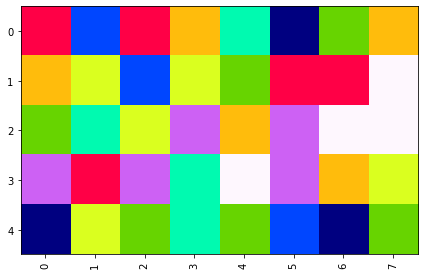

[[6, 1, 6, 5, 2, 0, 3, 5],
 [5, 4, 1, 4, 3, 6, 6, 8],
 [3, 2, 4, 7, 5, 7, 8, 8],
 [7, 6, 7, 2, 8, 7, 5, 4],
 [0, 4, 3, 2, 3, 1, 0, 3]]

In [ ]:
matrix = generate(8, 5)
depict(matrix)
matrix

これでケースはできました。次からは、この「色」（整数）が「ピース」を表すことにします。

# ピースを置く準備をします

ケースの中で、何もピースを置いていないマスをに整数 `-1` を置きましょう。

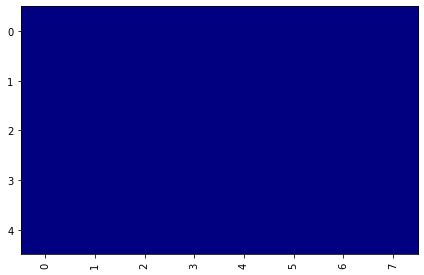

[[-1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1]]

In [ ]:
def generate(x, y):
    return [[-1 for _ in range(x)] for _ in range(y)]

matrix = generate(8, 5)
depict(matrix)
matrix

隅に `0` の正方形を置きます。これだけではパズルのピースにはなりませんね。

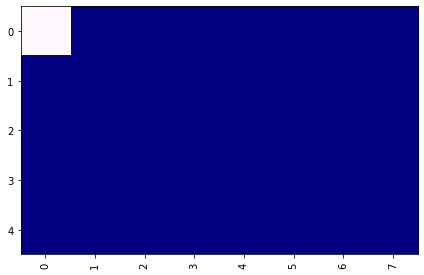

[[0, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1]]

In [ ]:
x_length = 8
y_length = 5
matrix = generate(x_length, y_length)

piece_id = 0
x = 0
y = 0
matrix[y][x] = piece_id

depict(matrix)
matrix

# ピースを置きます

実際のパズルでは、たとえば正方形が４つ連なったような形をしています。これを作ってみましょう。

まず、最初に置いた正方形（またはその集合）の隣の正方形を得るための関数を作ります。

In [ ]:
def get_rand_neighbor(piece, matrix):
    neighbors = []
    for x, y in piece:
        for dx, dy in [[0, 1], [0, -1], [1, 0], [-1, 0]]:
            if x - dx < 0 or x - dx >= len(matrix[0]):
                pass
            elif y - dy < 0 or y - dy >= len(matrix):
                pass
            elif matrix[y - dy][x - dx] == -1:
                neighbors.append([x - dx, y - dy])

    return neighbors

上のような動作を、指定された回数だけ繰り返して、望みの大きさの「ピース」を作りましょう。

In [ ]:
def get_new_piece(matrix, piece_size):
    piece = []

    for x in range(x_length):
        for y in range(y_length):
            if matrix[y][x] == -1:
                piece.append([x, y])
                break
        if len(piece) > 0:
            break

    for i in range(piece_size - 1):
        neighbors = get_rand_neighbor(piece, matrix)
        random.shuffle(neighbors)
        for x, y in neighbors:
            if [x, y] not in piece:
                piece.append([x, y])
                break
    
    return piece

これで準備ができました。さあ、ピースを１つ置いてみます。

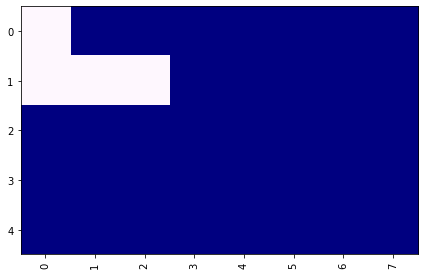

[[0, -1, -1, -1, -1, -1, -1, -1],
 [0, 0, 0, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1]]

In [ ]:
x_length = 8
y_length = 5
piece_size = 4
matrix = generate(x_length, y_length)

piece_id = 0
piece = get_new_piece(matrix, piece_size)
for x, y in piece:
    matrix[y][x] = piece_id

depict(matrix)
matrix

それっぽくなりましたね。ピースが占有するマスは `0` 以上の整数が与えられ、ピースに占有されていないマスは `-1` のままになっています。

# 置けるところまで置いてみます

次は、`-1` のままになっているマスに、次々にピースを置いていきましょう。置けるところまで置いてみます。

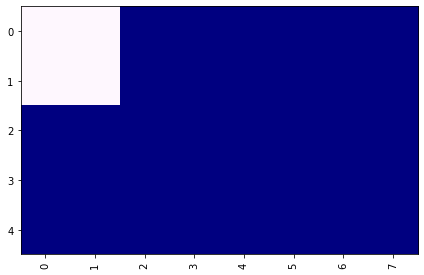

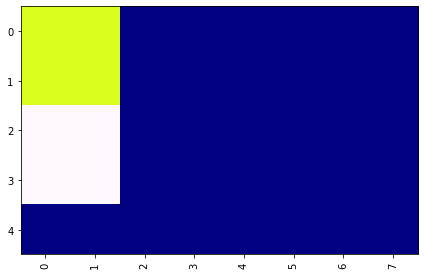

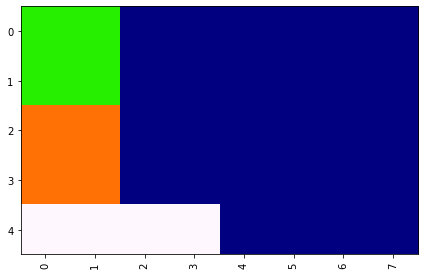

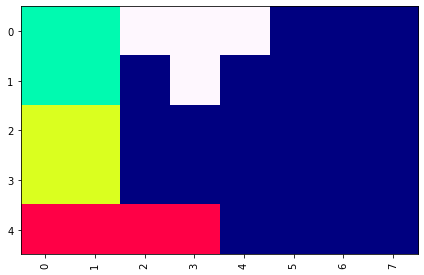

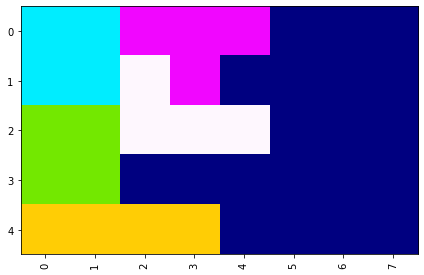

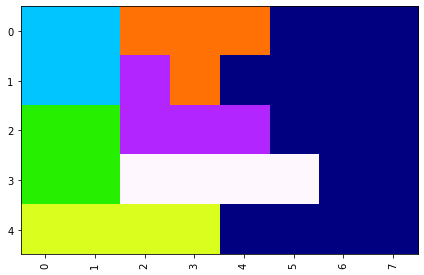

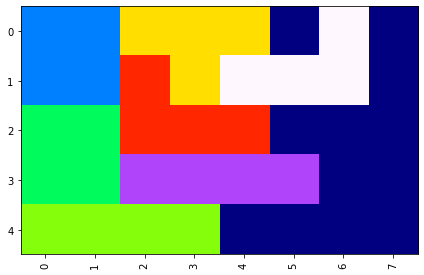

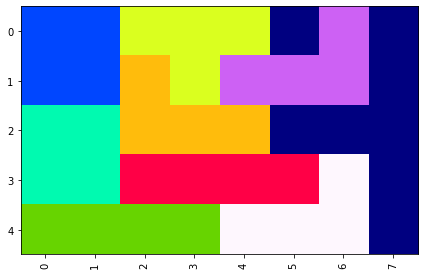

[[0, 0, 3, 3, 3, -1, 6, -1],
 [0, 0, 4, 3, 6, 6, 6, -1],
 [1, 1, 4, 4, 4, -1, -1, -1],
 [1, 1, 5, 5, 5, 5, 7, -1],
 [2, 2, 2, 2, 7, 7, 7, -1]]

In [ ]:
x_length = 8
y_length = 5
piece_size = 4
matrix = generate(x_length, y_length)

piece_id = 0
piece = get_new_piece(matrix, piece_size)

while len(piece) == piece_size:
    for x, y in piece:
        matrix[y][x] = piece_id
    depict(matrix)
    
    piece = get_new_piece(matrix, piece_size)
    piece_id += 1

matrix

ピースの形の選び方ははランダムに決まるため、運が良ければ最後までたどり着いて完成しますが、普通は、途中で行き詰まって完成せずに終了します。

# 同じ形のピースの数には制限があります

さて、実際のパズルでは、同じ形のピースをいくつも選べたりはしません。同じ形のピースの数には制限があります。そこで、ピースの形を判定して、同じ形のピースの個数を数えながら、制限を超えない範囲でピースを選ぶようにしましょう。

In [ ]:
def shape_key(piece):
    distances = []
    for i in range(len(piece)):
        xy1 = piece[i]
        for j in range(len(piece)):
            if i < j:
                xy2 = piece[j]
                distance = (xy1[0] - xy2[0])**2 + (xy1[1] - xy2[1])**2
                distances.append(distance)
    return "".join(str(sorted(distances)))

上記のコードで、同じ形のピースは同じ `key` が割り当てられるようにしました。こうすることで、問題としてはもっと難しくなってしまいました。

# 完成するまでひたすら繰り返します

完成するまでひたすら試行錯誤を繰り返すコードは次のようになります。

1133 th trial


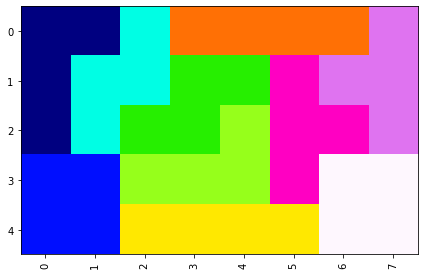

[[0, 0, 2, 6, 6, 6, 6, 8],
 [0, 2, 2, 3, 3, 7, 8, 8],
 [0, 2, 3, 3, 4, 7, 7, 8],
 [1, 1, 4, 4, 4, 7, 9, 9],
 [1, 1, 5, 5, 5, 5, 9, 9]]

In [ ]:
x_length = 8
y_length = 5
piece_size = 4
same_piece_limit = 2
max_trial = 530000
best_score = x_length * y_length
best_matrix = generate(x_length, y_length)

for trial in range(max_trial):
    matrix = generate(x_length, y_length)
    count = {}
    piece_id = 0
    piece = get_new_piece(matrix, piece_size)
    key = shape_key(piece)
    count[key] = 1

    while len(piece) == piece_size:
        for x, y in piece:
            matrix[y][x] = piece_id
        
        piece = get_new_piece(matrix, piece_size)
        key = shape_key(piece)
        if key not in count.keys():
            count[key] = 0
        count[key] += 1
        if count[key] > same_piece_limit:
            break

        piece_id += 1

    score = sum([sum([1 if x == -1 else 0 for x in mat]) for mat in matrix])

    if best_score > score:
        best_score = score
        best_matrix = matrix

    if score == 0:
        print(trial, "th trial")
        break

depict(best_matrix)
best_matrix

最初に説明した[脳ブロック](https://bb.tenyo.co.jp/products/index.html)のうち、レベル１とされる「テトラミノ」は、これで解けるようになりました。ランダムにピースを選んでいくので、実行するたびに違う解が得られます。

同じコードで、レベル２とされる「ペンタミノ」を解いてみましょう。与える変数を少し変えるだけで解けるはずです。

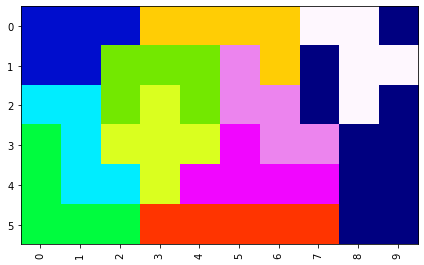

[[0, 0, 0, 5, 5, 5, 5, 9, 9, -1],
 [0, 0, 3, 3, 3, 8, 5, -1, 9, 9],
 [1, 1, 3, 4, 3, 8, 8, -1, 9, -1],
 [2, 1, 4, 4, 4, 7, 8, 8, -1, -1],
 [2, 1, 1, 4, 7, 7, 7, 7, -1, -1],
 [2, 2, 2, 6, 6, 6, 6, 6, -1, -1]]

In [ ]:
x_length = 10
y_length = 6
piece_size = 5
same_piece_limit = 1
max_trial = 530000
best_score = x_length * y_length
best_matrix = generate(x_length, y_length)

for trial in range(max_trial):
    matrix = generate(x_length, y_length)
    count = {}
    piece_id = 0
    piece = get_new_piece(matrix, piece_size)
    key = shape_key(piece)
    count[key] = 1

    while len(piece) == piece_size:
        for x, y in piece:
            matrix[y][x] = piece_id
        
        piece = get_new_piece(matrix, piece_size)
        key = shape_key(piece)
        if key not in count.keys():
            count[key] = 0
        count[key] += 1
        if count[key] > same_piece_limit:
            break

        piece_id += 1

    score = sum([sum([1 if x == -1 else 0 for x in mat]) for mat in matrix])

    if best_score > score:
        best_score = score
        best_matrix = matrix

    if score == 0:
        print(trial, "th trial")
        break

depict(best_matrix)
best_matrix

...と思ったら、なかなか解けませんね。私も何度も計算し直しましたが、レベル２のペンタミノは組み合わせの数が多すぎて、このコードでは正解にたどり着けないようです。おそるべし。

# 今はここまで

In [ ]:
import copy

def get_new_pieces(matrix):
    piece = []

    for x in range(x_length):
        for y in range(y_length):
            if matrix[y][x] == -1:
                piece.append([x, y])
                break
        if len(piece) > 0:
            break

    result_pieces = []
    waiting = []
    waiting.append(piece)
    while len(waiting) > 0:
        piece = waiting.pop()
        neighbors = get_rand_neighbor(piece, matrix)
        for x, y in neighbors:
            if [x, y] not in piece:
                new_piece = copy.deepcopy(piece)
                new_piece.append([x, y])
                if len(new_piece) == piece_size:
                    new_piece = sorted(new_piece)
                    if new_piece not in result_pieces:
                        result_pieces.append(new_piece)
                else:
                    waiting.append(new_piece)

    return sorted(result_pieces)

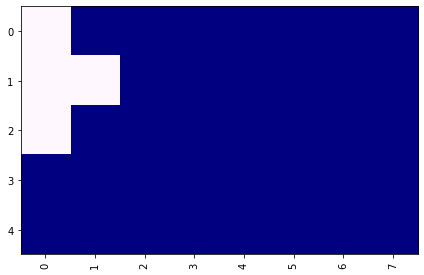

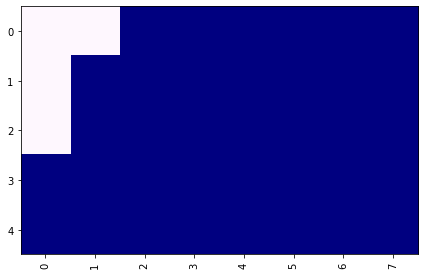

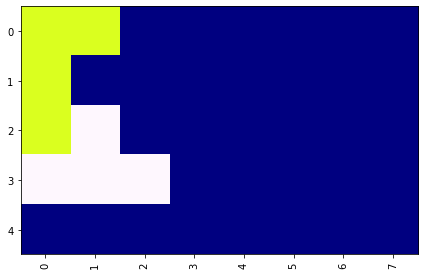

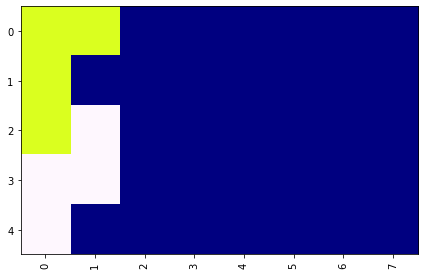

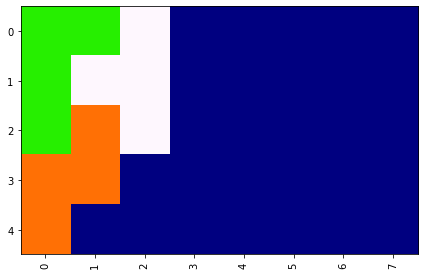

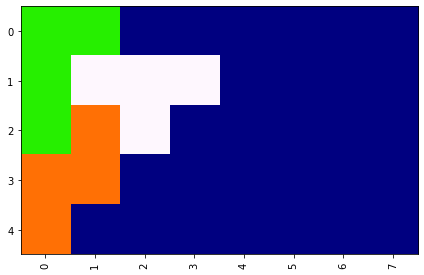

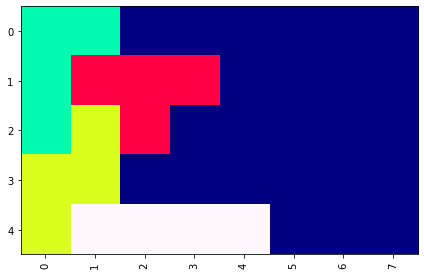

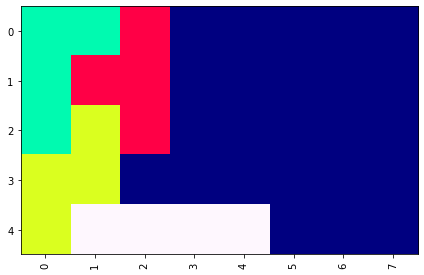

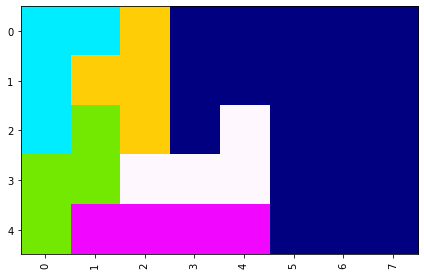

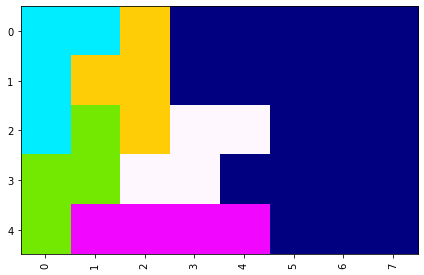

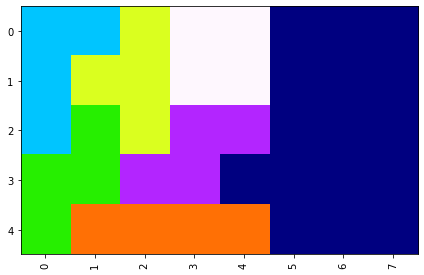

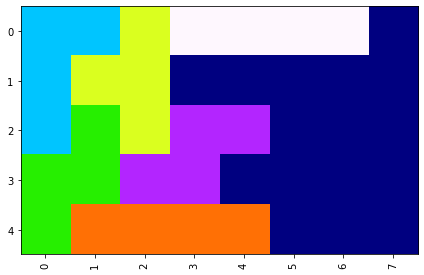

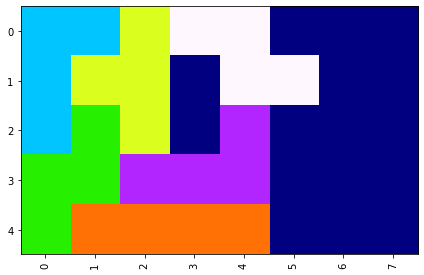

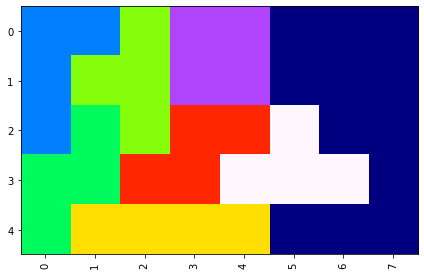

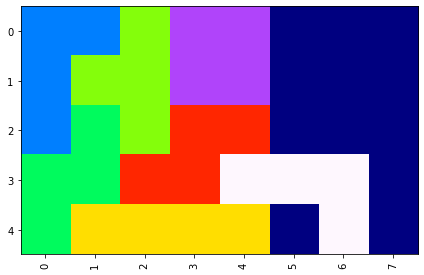

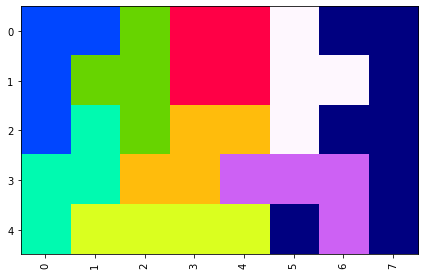

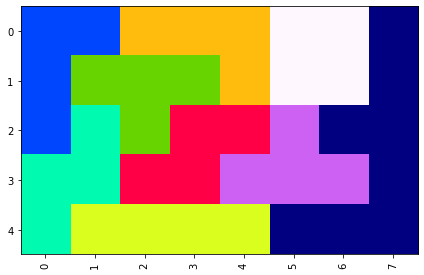

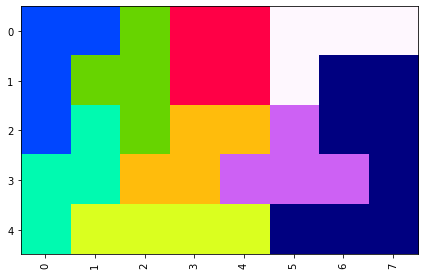

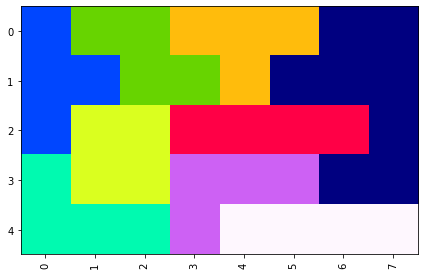

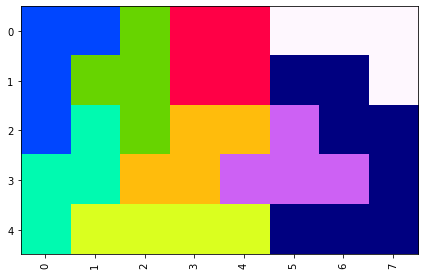

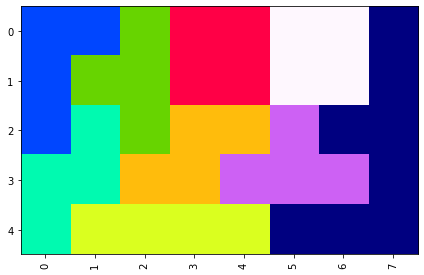

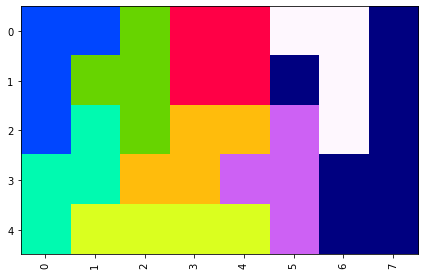

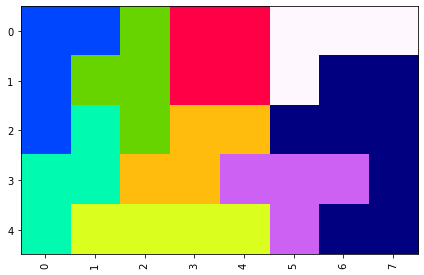

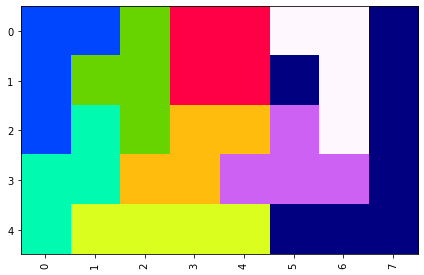

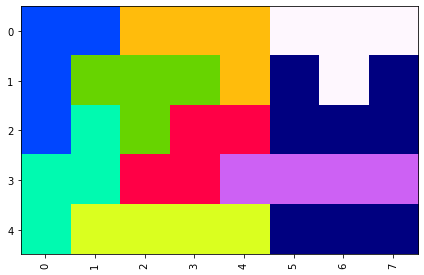

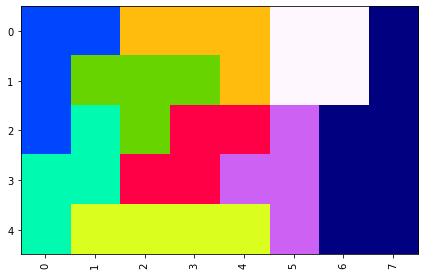

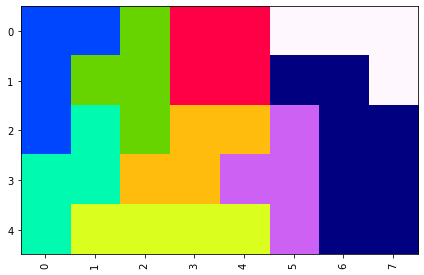

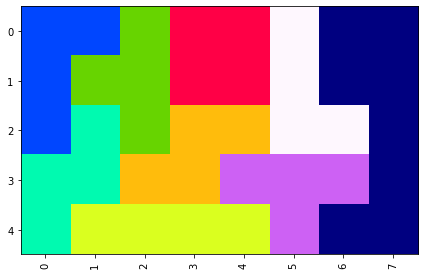

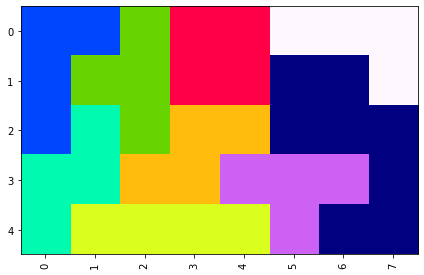

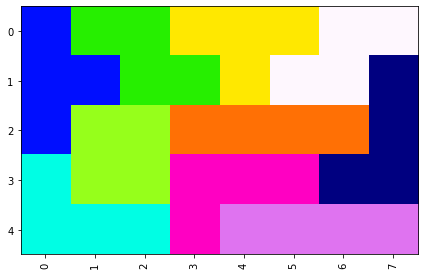

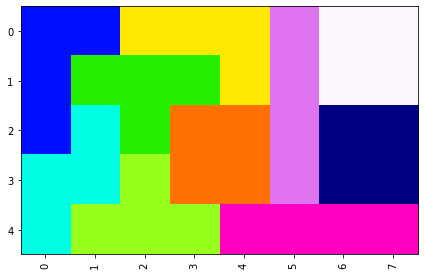

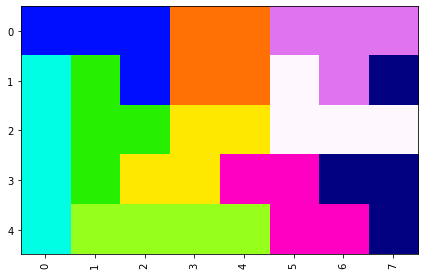

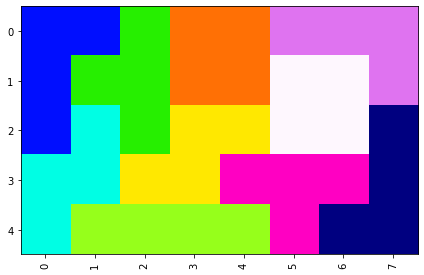

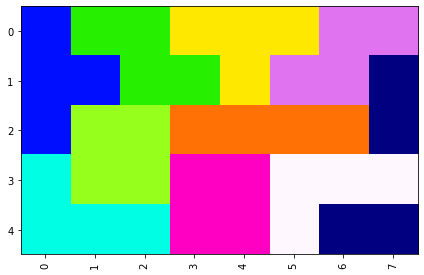

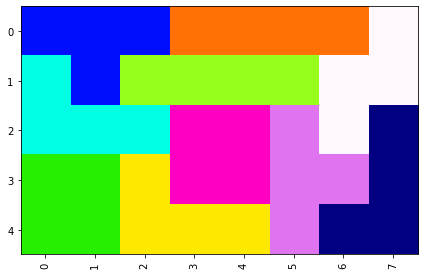

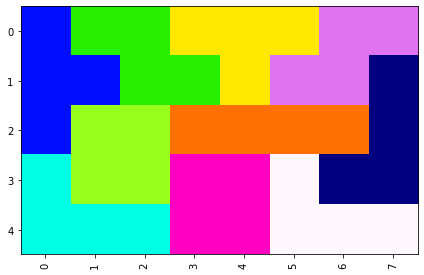

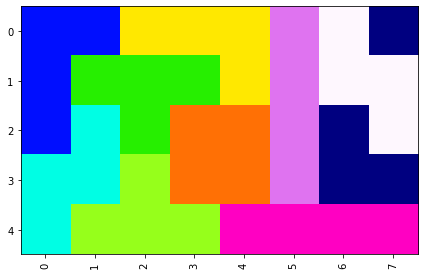

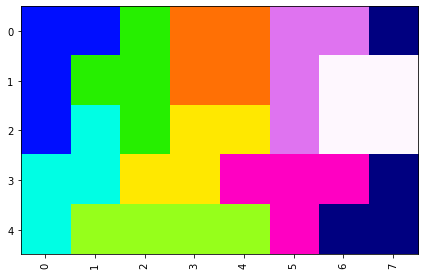

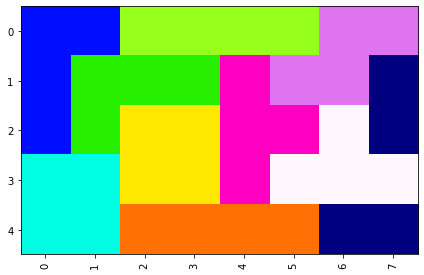

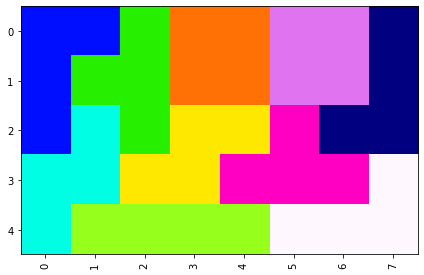

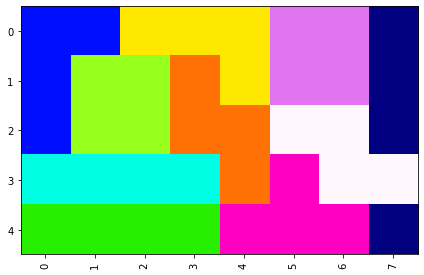

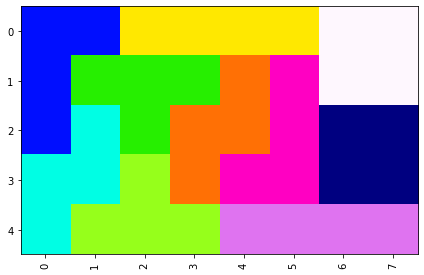

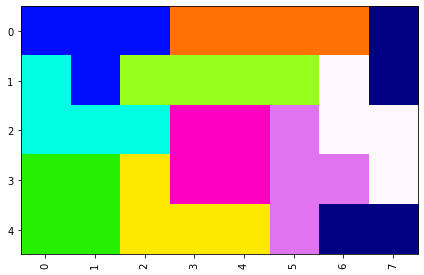

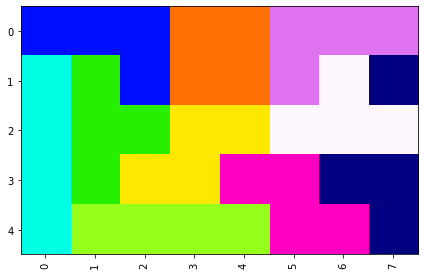

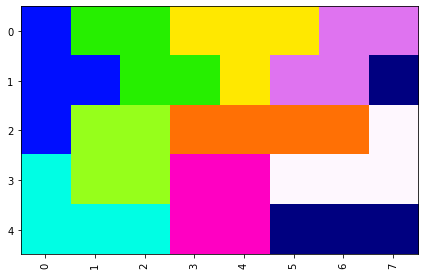

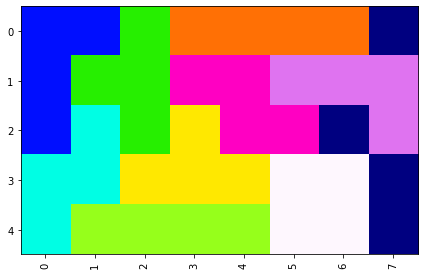

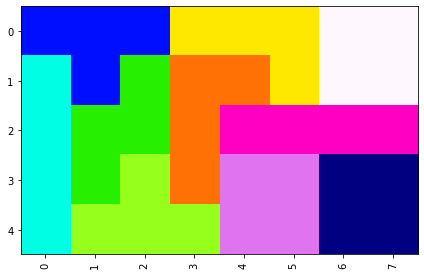

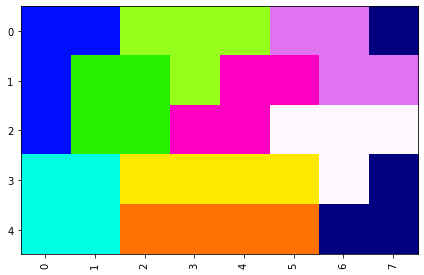

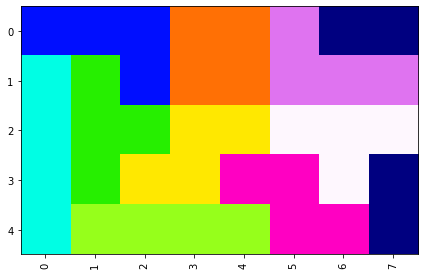

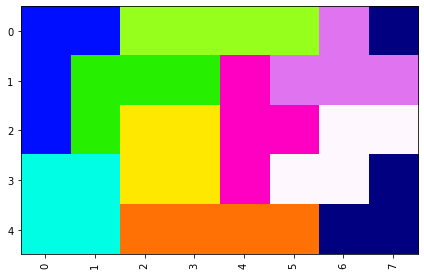

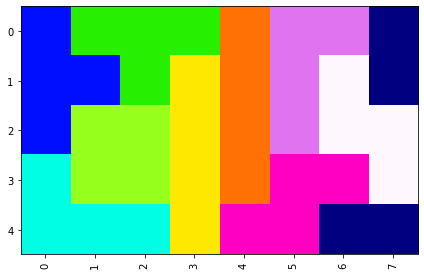

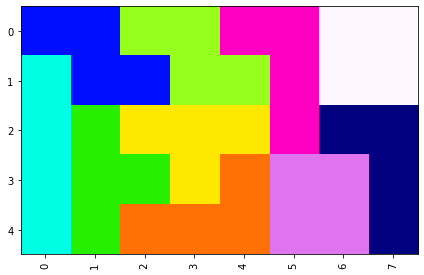

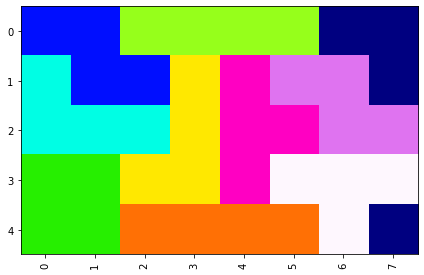

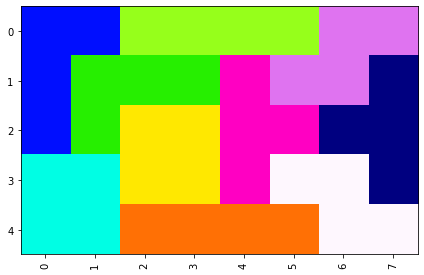

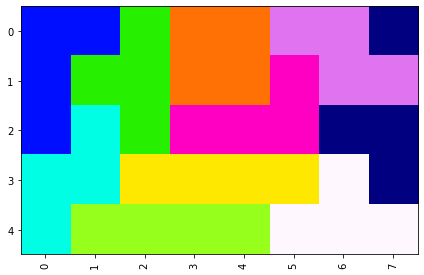

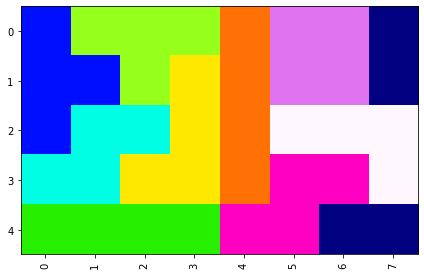

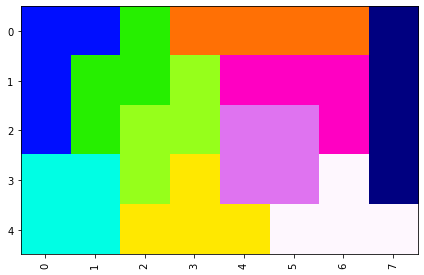

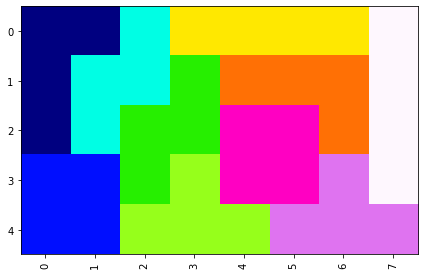

([[0, 0, 2, 5, 5, 5, 5, 9],
  [0, 2, 2, 3, 6, 6, 6, 9],
  [0, 2, 3, 3, 7, 7, 6, 9],
  [1, 1, 3, 4, 7, 7, 8, 9],
  [1, 1, 4, 4, 4, 8, 8, 8]],
 [[[0, 0], [0, 1], [0, 2], [1, 0]],
  [[0, 3], [0, 4], [1, 3], [1, 4]],
  [[1, 1], [1, 2], [2, 0], [2, 1]],
  [[2, 2], [2, 3], [3, 1], [3, 2]],
  [[2, 4], [3, 3], [3, 4], [4, 4]],
  [[3, 0], [4, 0], [5, 0], [6, 0]],
  [[4, 1], [5, 1], [6, 1], [6, 2]],
  [[4, 2], [4, 3], [5, 2], [5, 3]],
  [[5, 4], [6, 3], [6, 4], [7, 4]],
  [[7, 0], [7, 1], [7, 2], [7, 3]]])

In [ ]:
def solve_puzzle(x_length, y_length, piece_size, same_piece_limit):
    best_score = x_length * y_length
    best_matrix = generate(x_length, y_length)
    n_depict = 0
    n_pieces = int(x_length * y_length / piece_size)
    waiting = []
    piece_id = 0
    matrix = generate(x_length, y_length)
    for new_piece in get_new_pieces(matrix):
        pieces2count = {}
        key = shape_key(new_piece)
        pieces2count[key] = 1
        new_matrix = copy.deepcopy(matrix)
        for x, y in new_piece:
            new_matrix[y][x] = piece_id
        pieces = [new_piece]
        waiting.append([piece_id + 1, pieces, new_matrix, pieces2count])

    trial = 0
    random.shuffle(waiting)
    while len(waiting) > 0:
        trial += 1
        if trial > 530000:
            break
        random.shuffle(waiting)
        piece_id, pieces, matrix, pieces2count = waiting.pop()
        score = sum([sum([1 if x == -1 else 0 for x in mat]) for mat in matrix])

        if best_score >= score:
            best_score = score
            best_matrix = matrix
            depict(best_matrix)
        if score == 0:
            break

        new_pieces = get_new_pieces(matrix)
        for new_piece in new_pieces:
            new_pieces2count = copy.deepcopy(pieces2count)
            key = shape_key(new_piece)
            if key not in new_pieces2count.keys():
                new_pieces2count[key] = 0
            new_pieces2count[key] += 1
            if new_pieces2count[key] > same_piece_limit:
                continue

            new_pieces = copy.deepcopy(pieces)
            new_pieces.append(new_piece)
            new_matrix = copy.deepcopy(matrix)
            for x, y in new_piece:
                new_matrix[y][x] = piece_id

            waiting.append([piece_id + 1, new_pieces, new_matrix, new_pieces2count])
            
    return matrix, pieces

x_length, y_length, piece_size, same_piece_limit = 8, 5, 4, 2
best_matrix = solve_puzzle(x_length, y_length, piece_size, same_piece_limit)
best_matrix

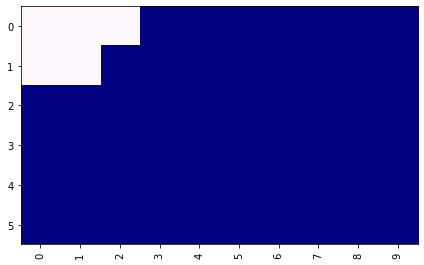

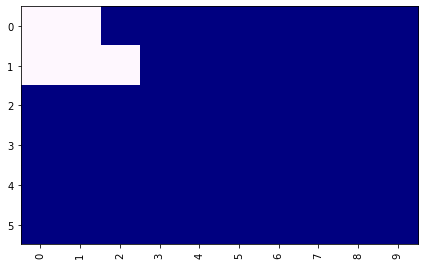

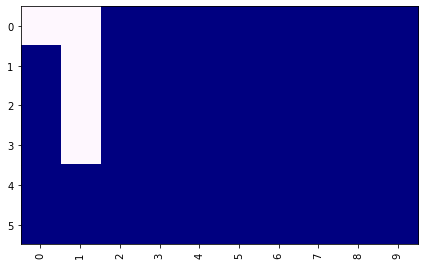

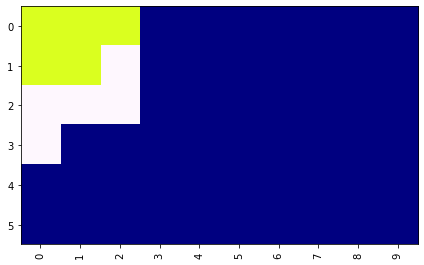

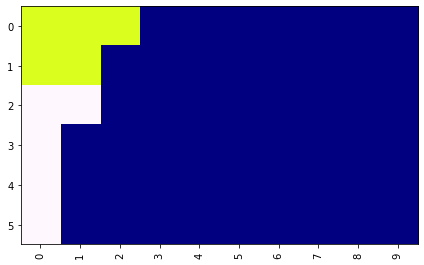

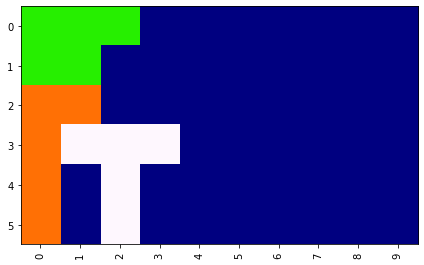

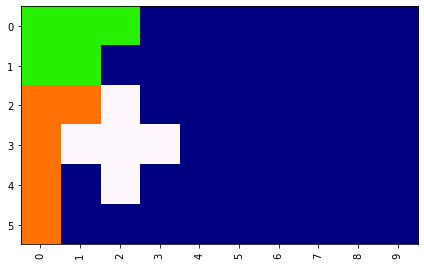

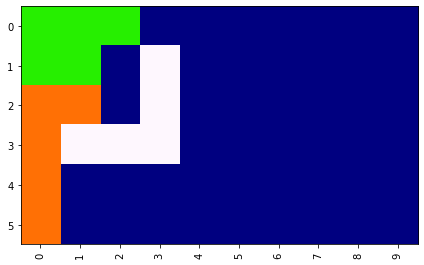

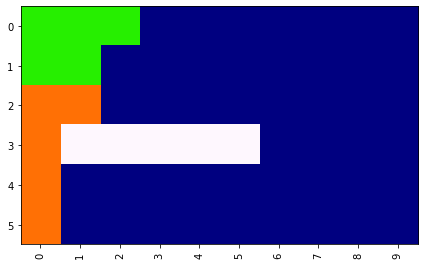

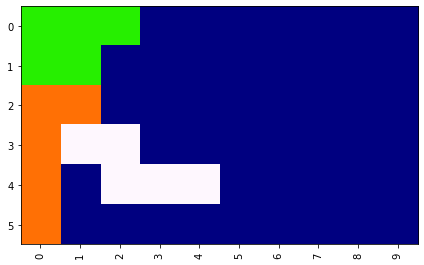

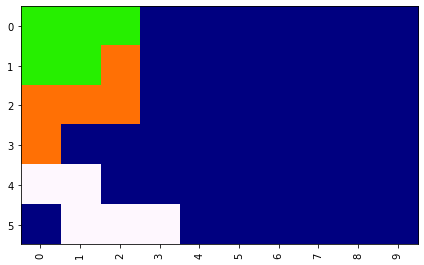

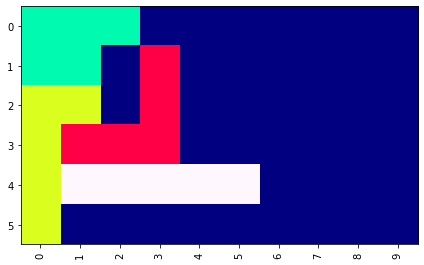

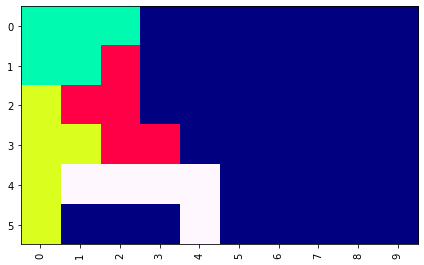

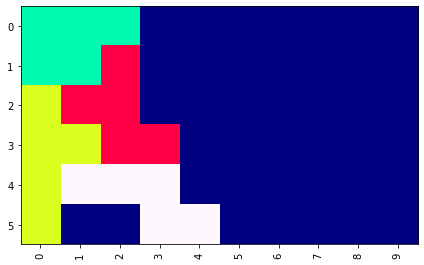

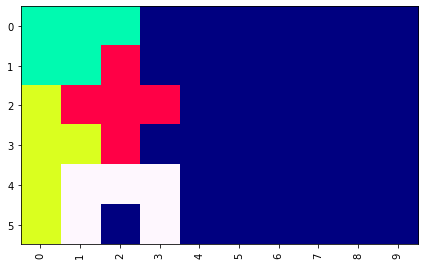

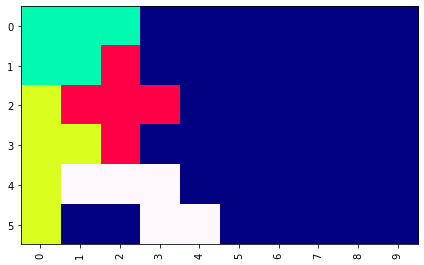

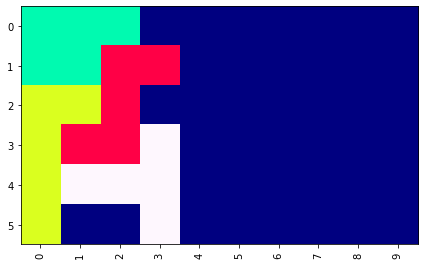

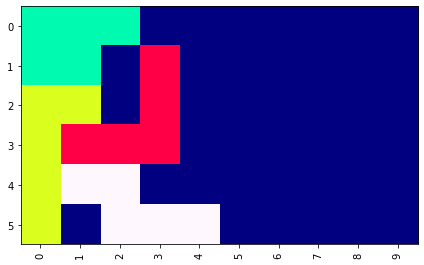

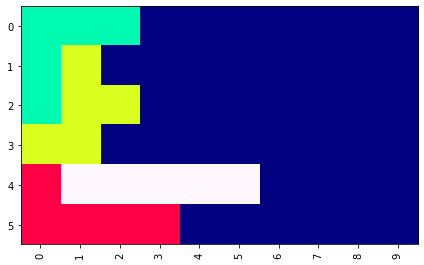

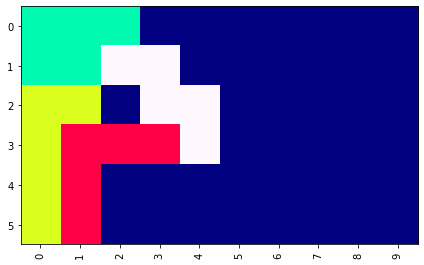

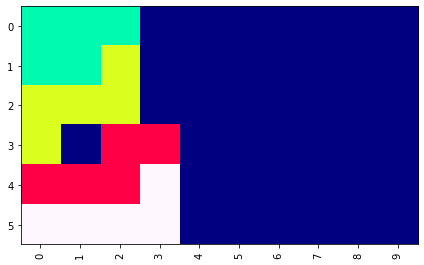

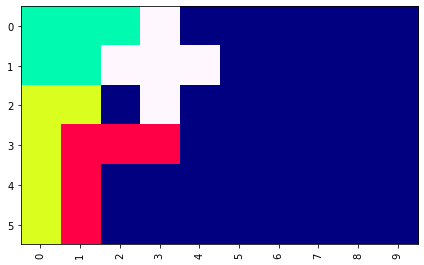

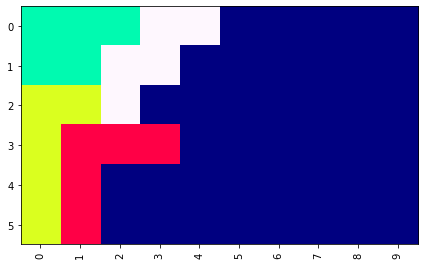

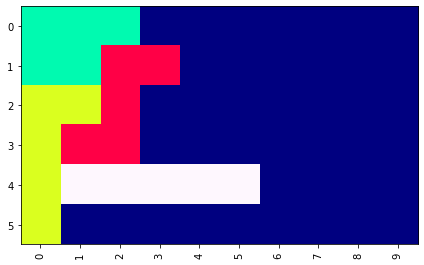

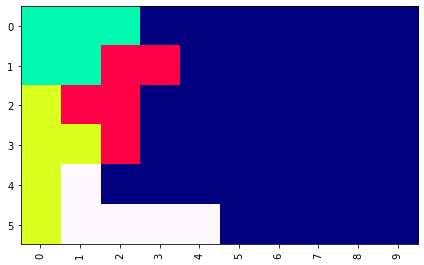

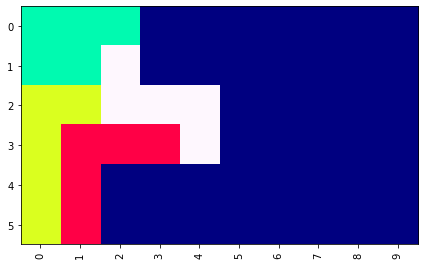

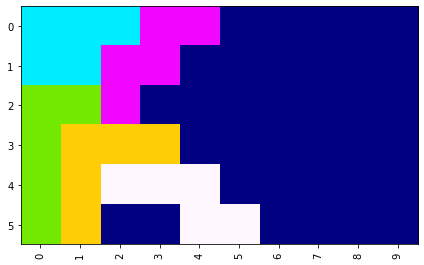

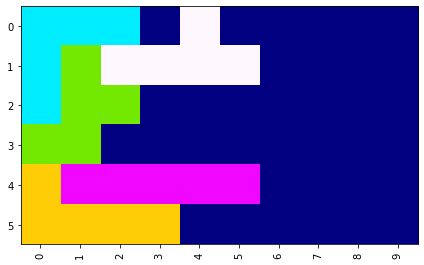

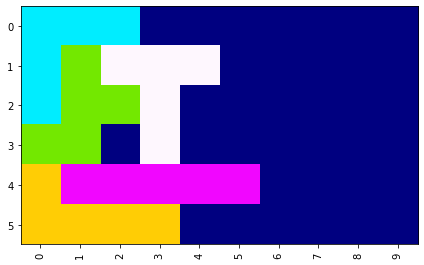

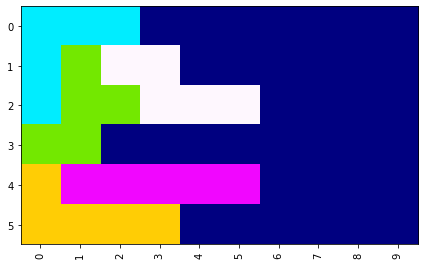

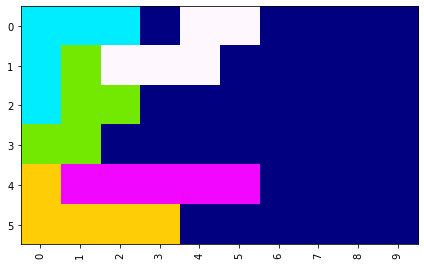

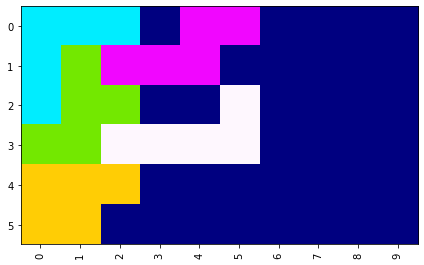

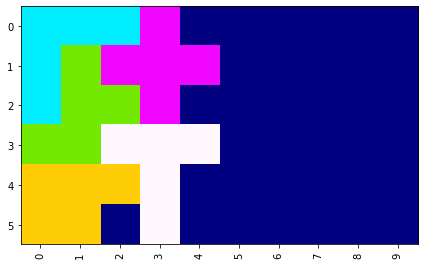

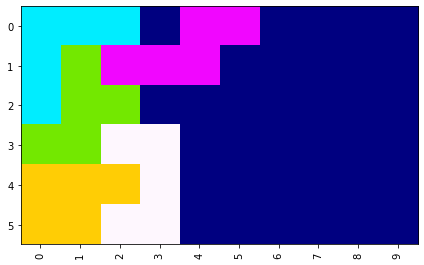

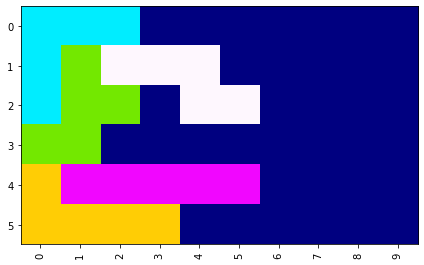

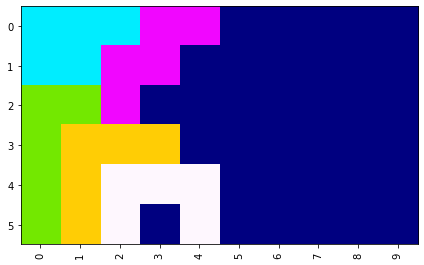

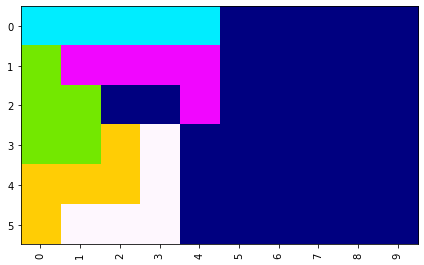

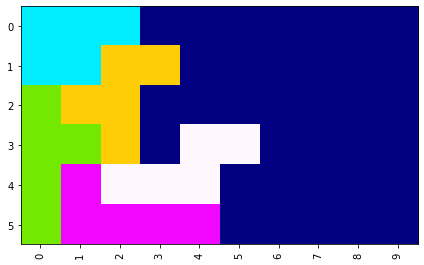

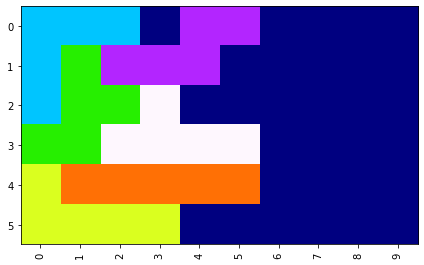

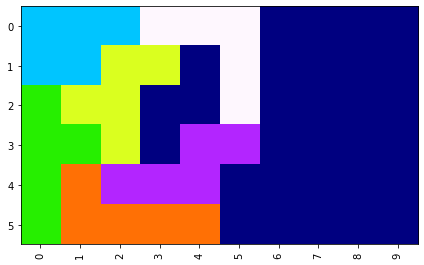

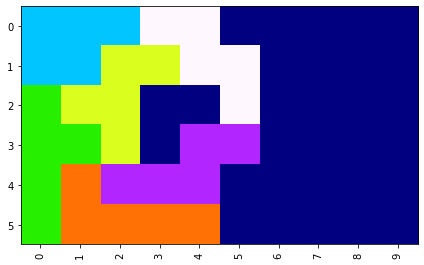

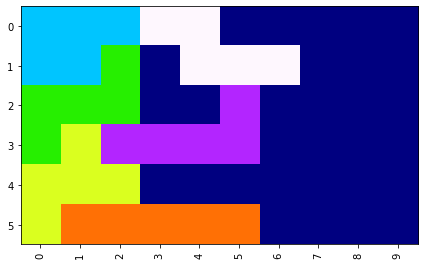

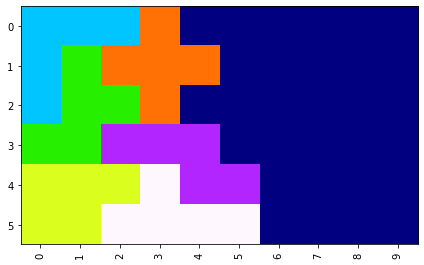

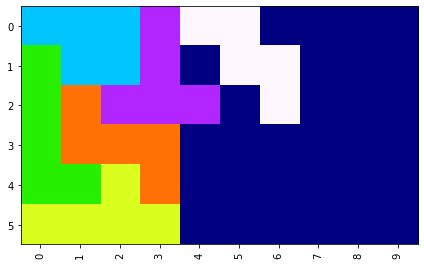

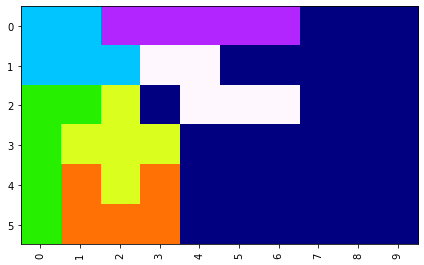

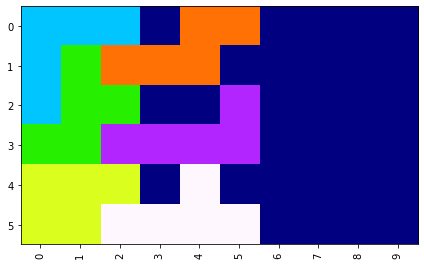

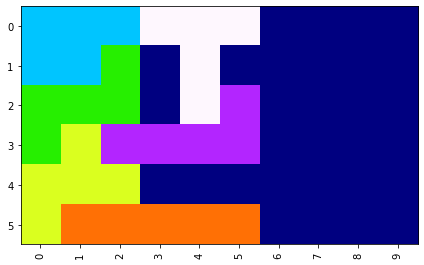

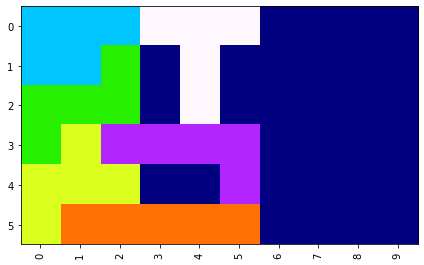

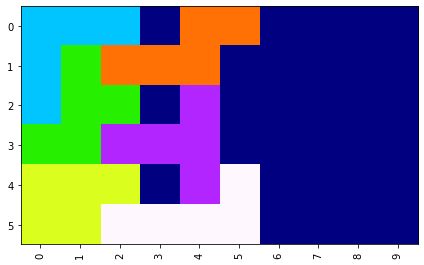

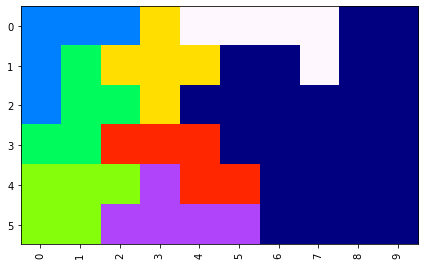

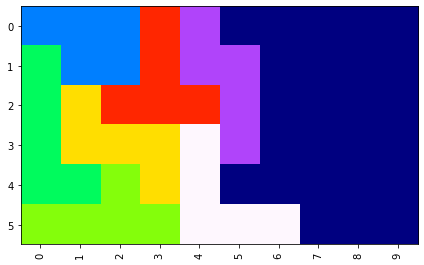

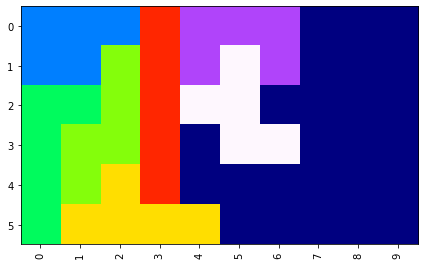

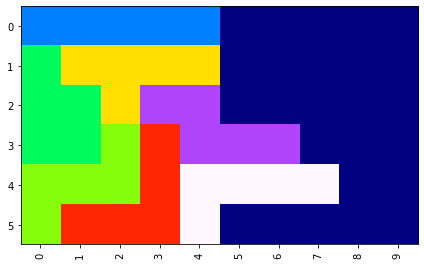

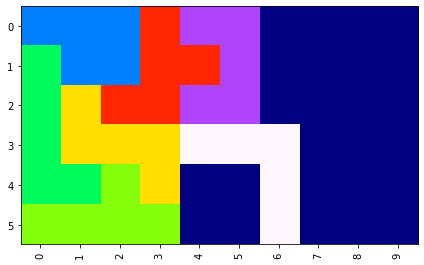

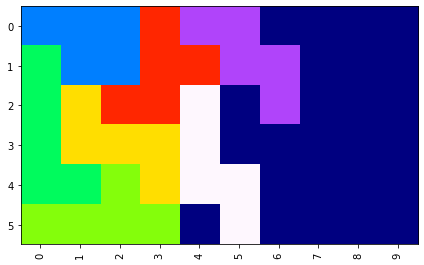

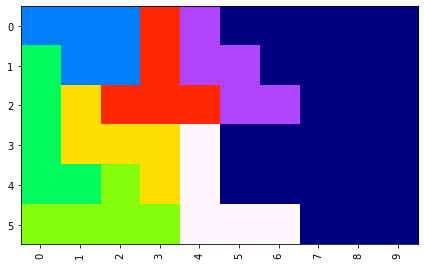

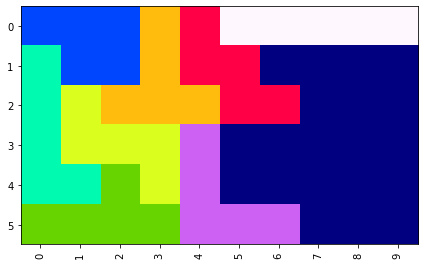

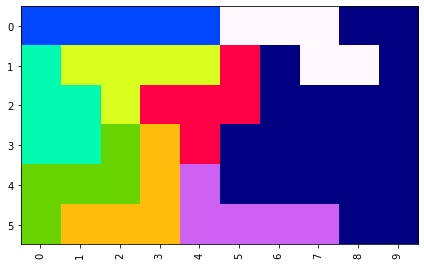

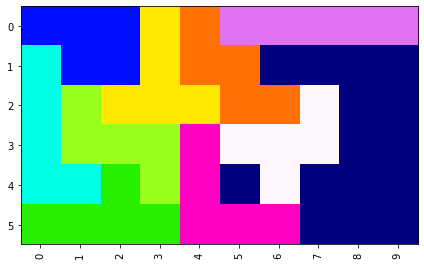

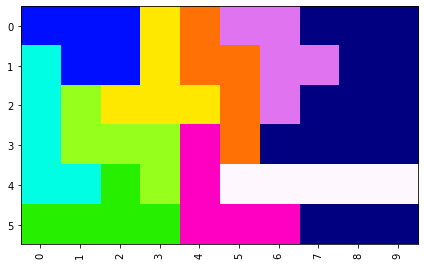

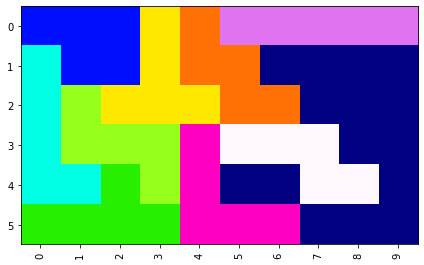

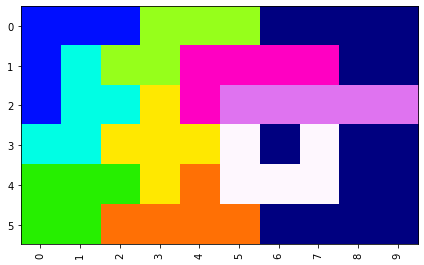

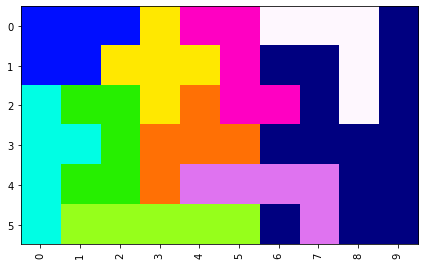

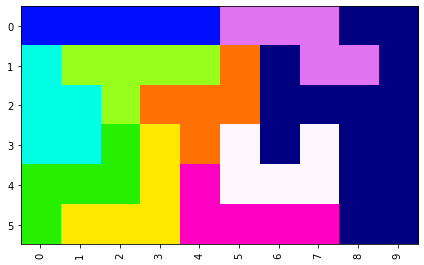

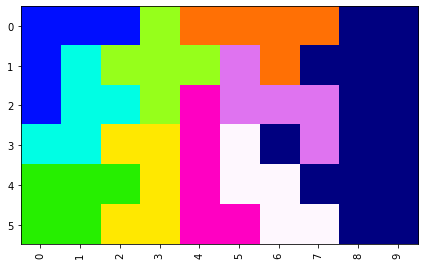

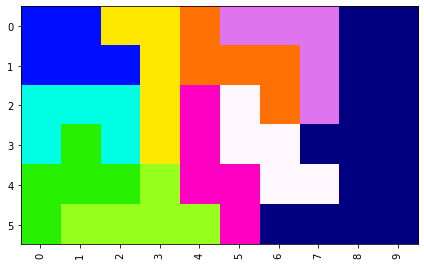

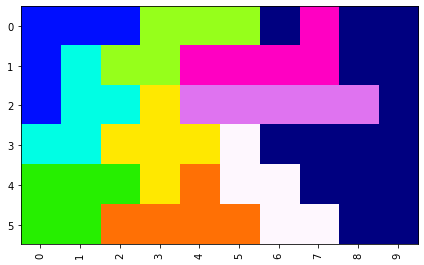

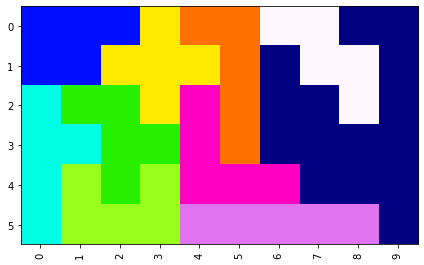

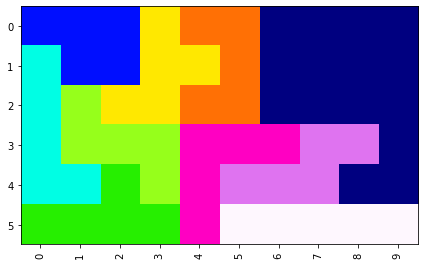

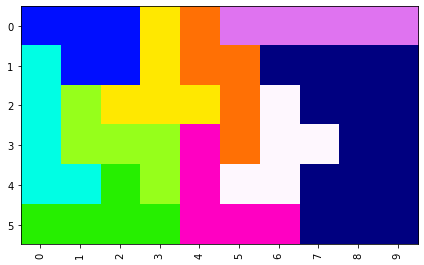

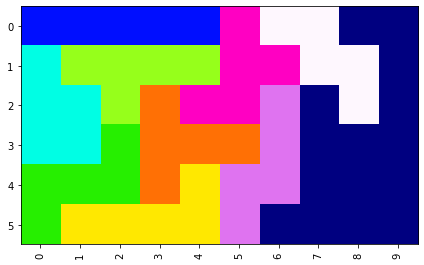

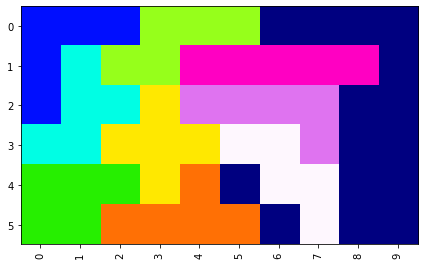

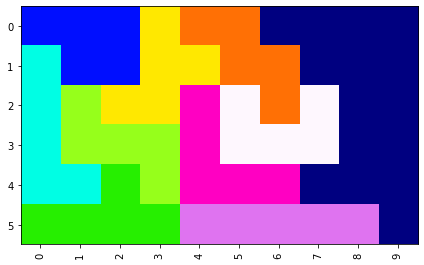

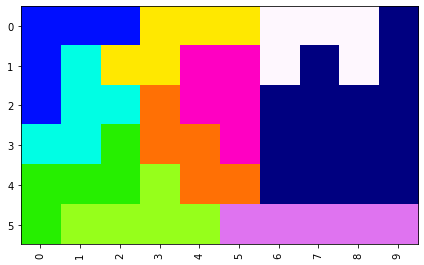

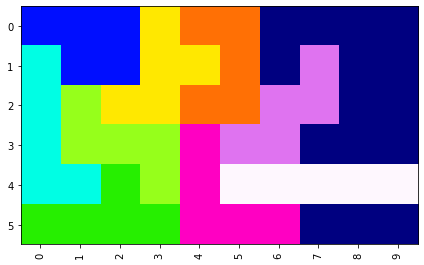

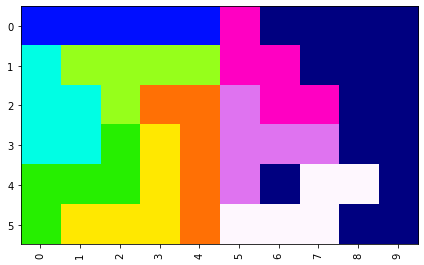

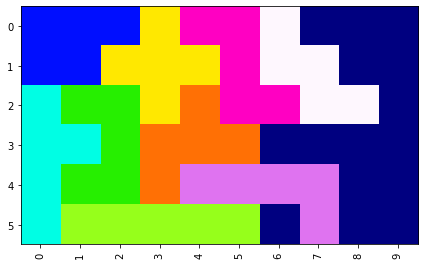

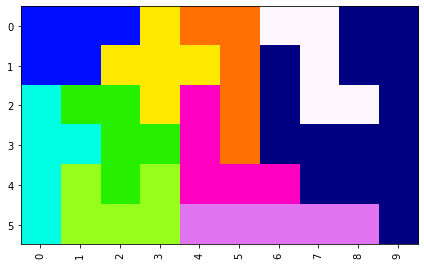

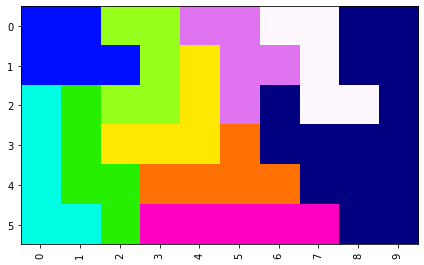

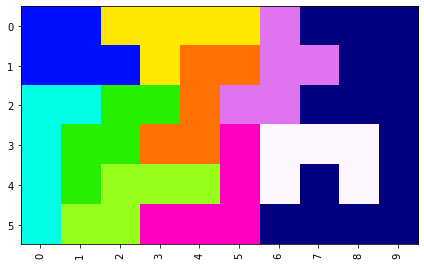

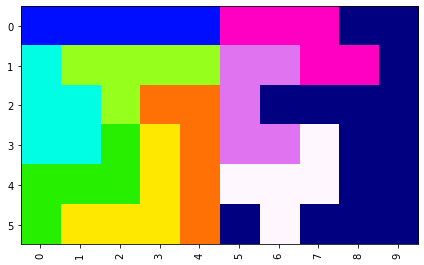

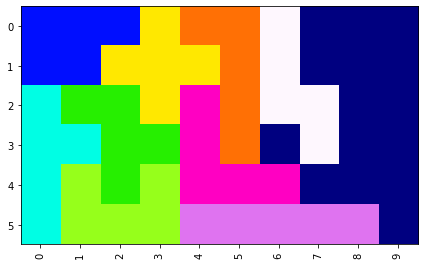

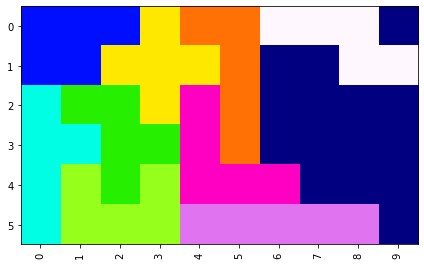

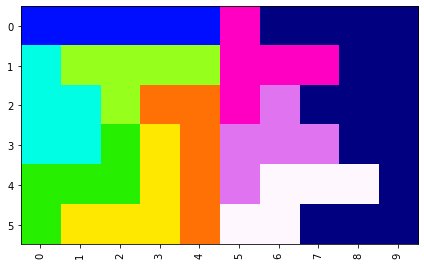

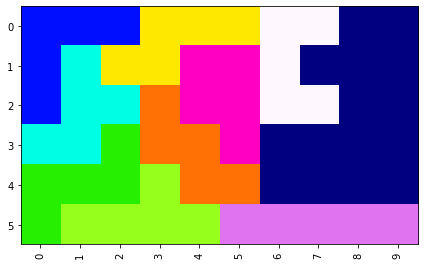

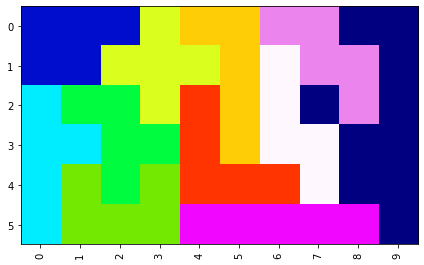

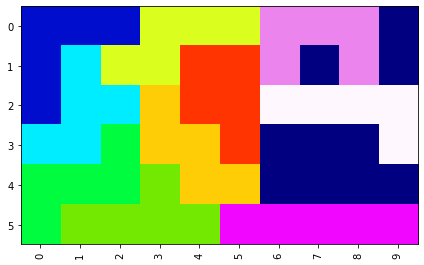

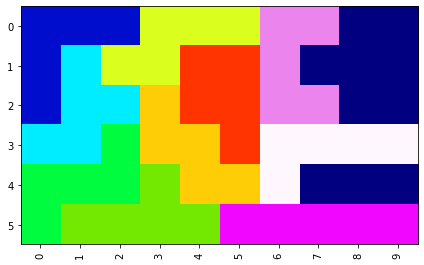

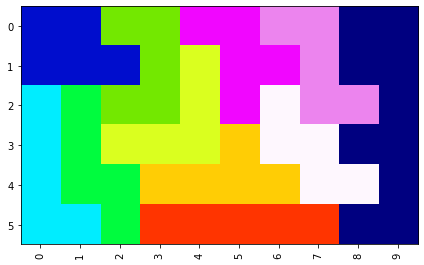

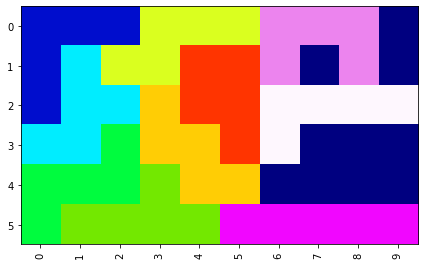

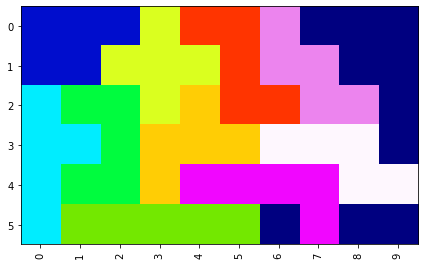

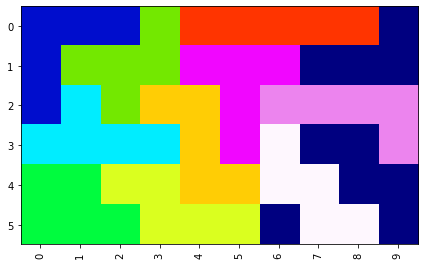

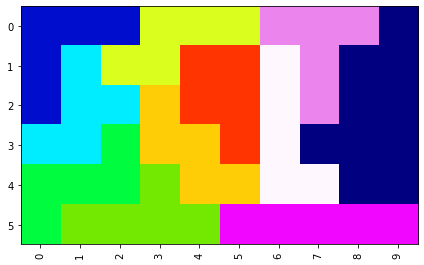

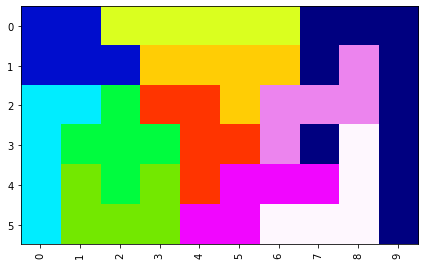

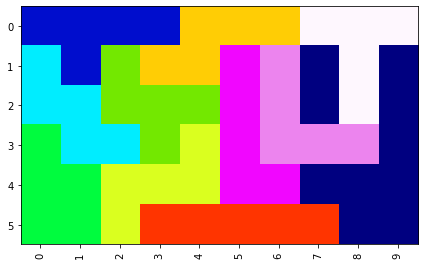

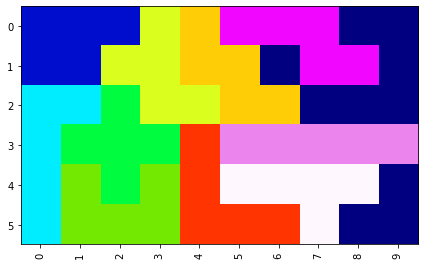

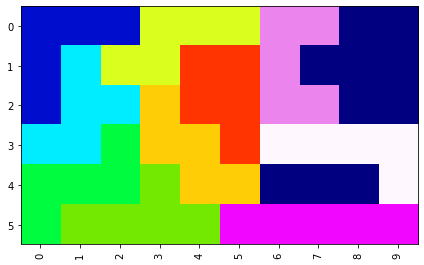

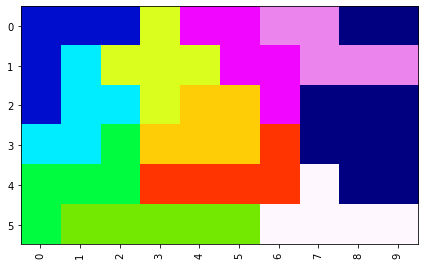

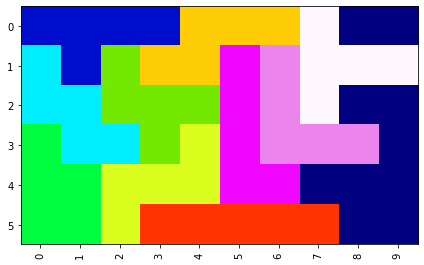

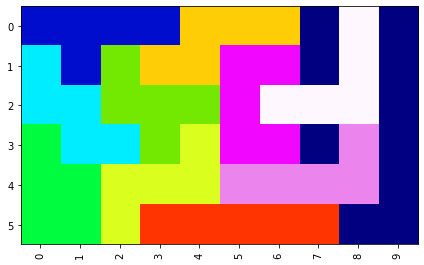

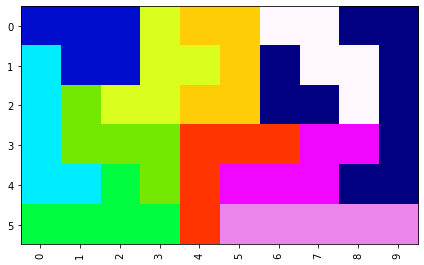

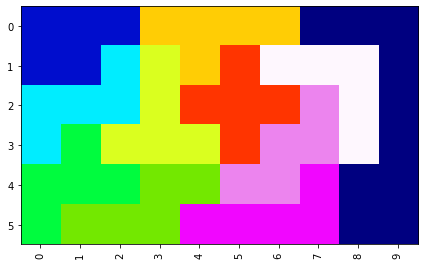

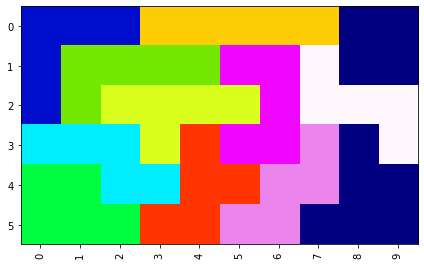

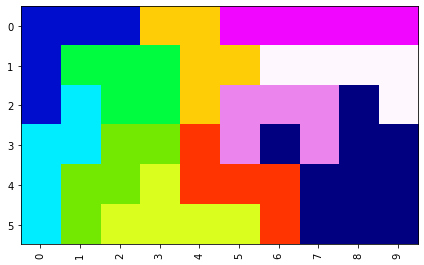

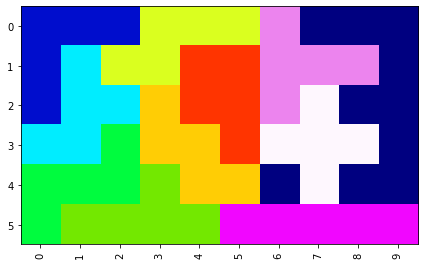

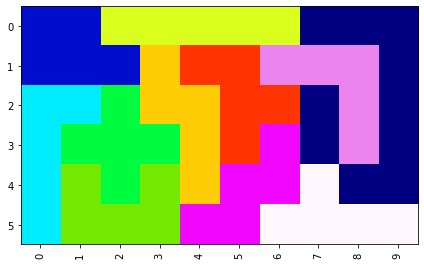

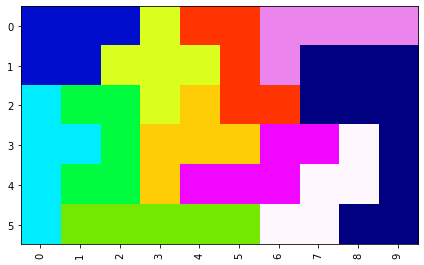

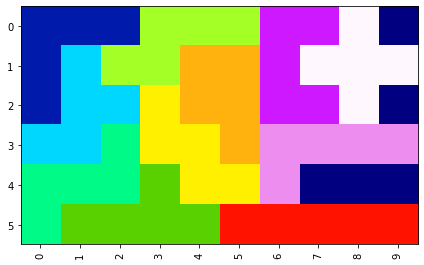

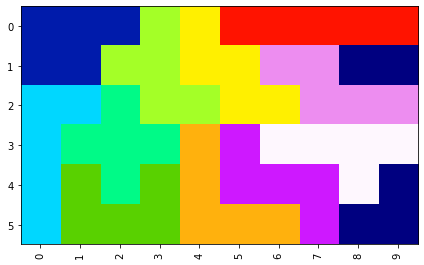

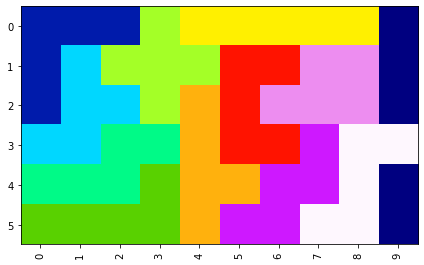

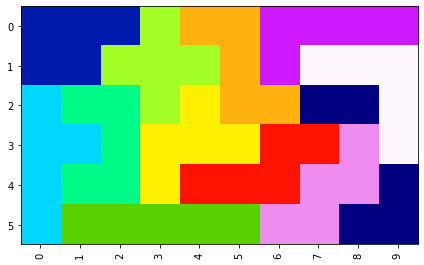

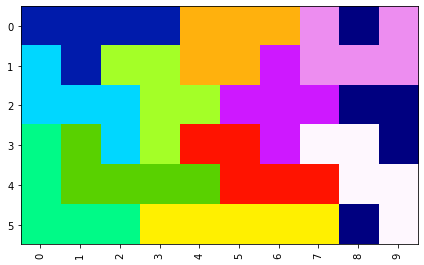

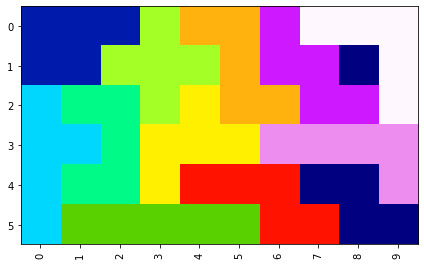

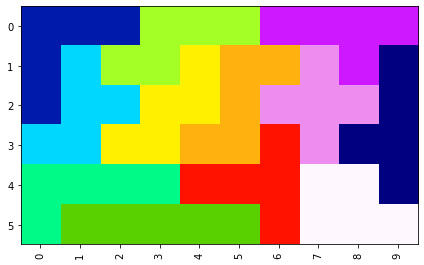

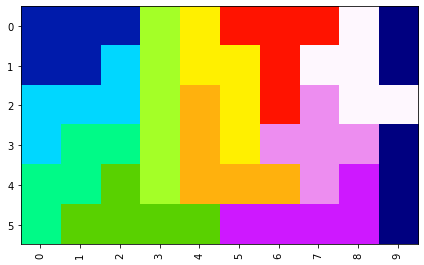

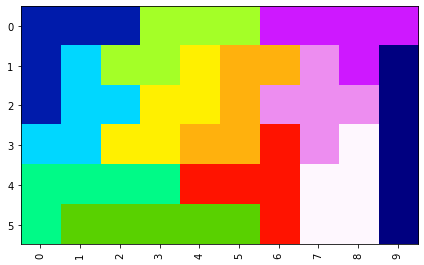

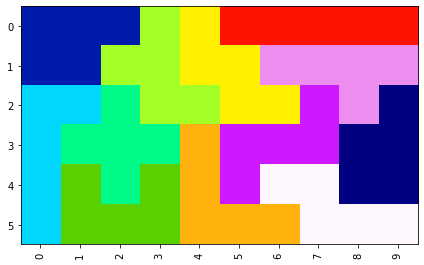

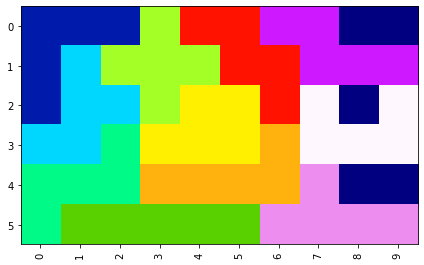

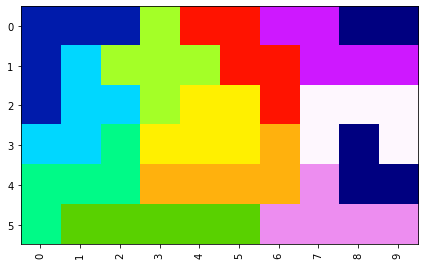

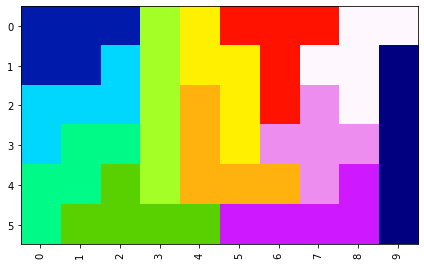

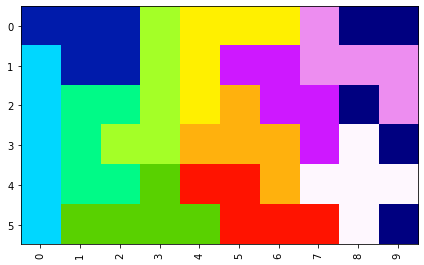

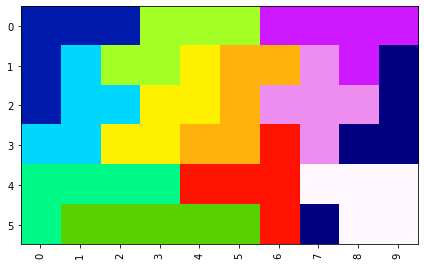

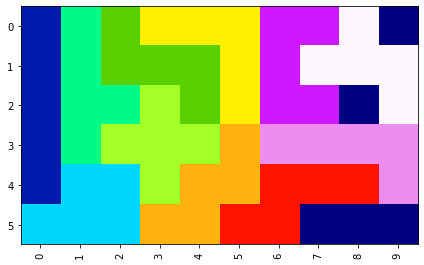

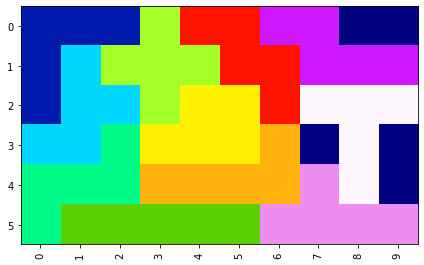

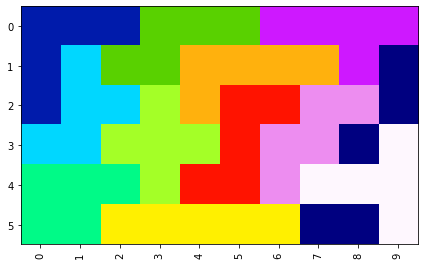

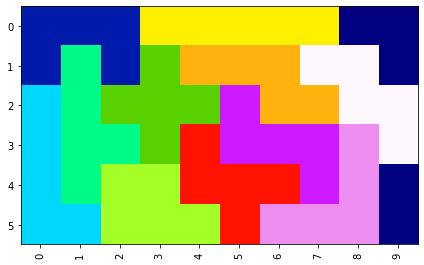

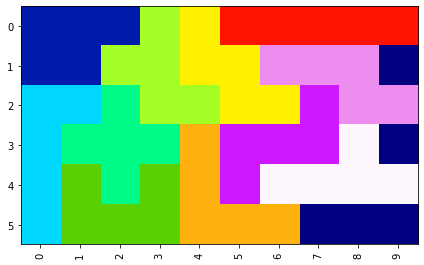

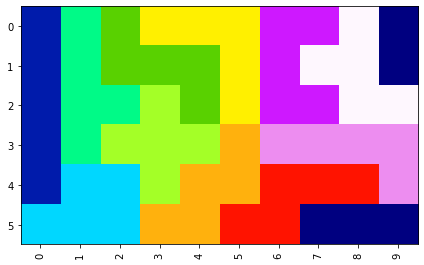

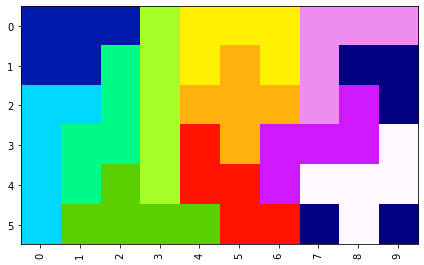

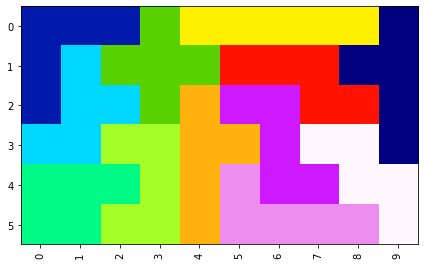

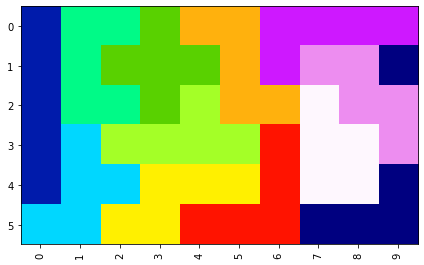

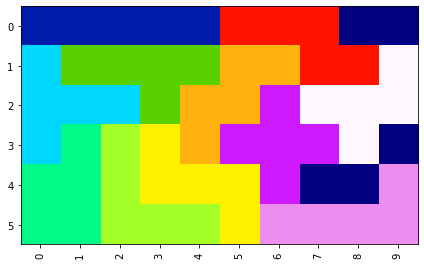

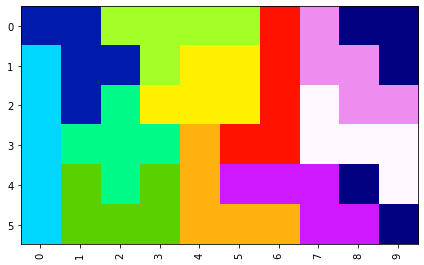

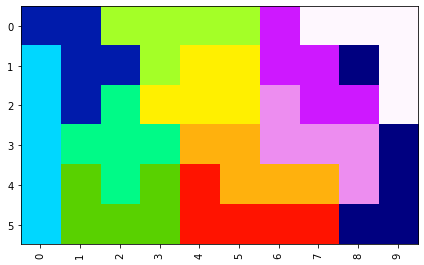

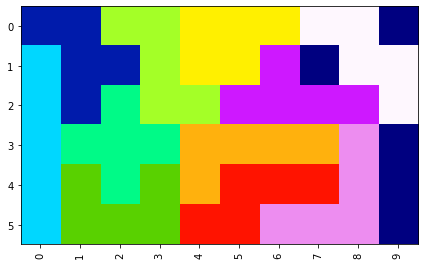

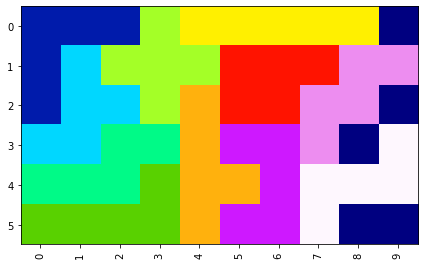

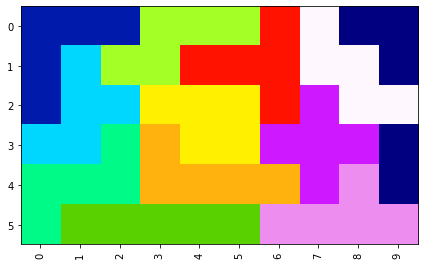

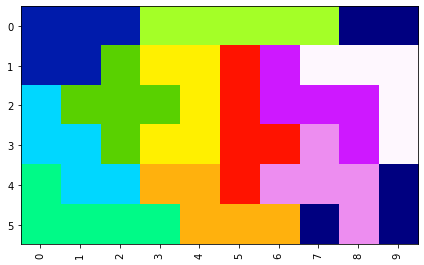

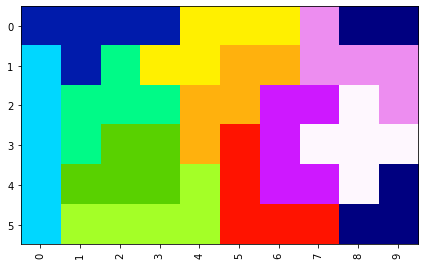

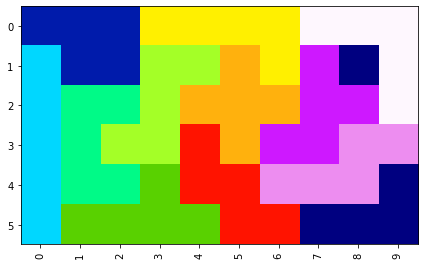

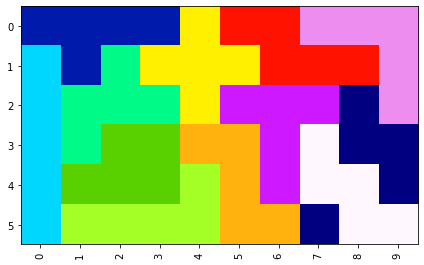

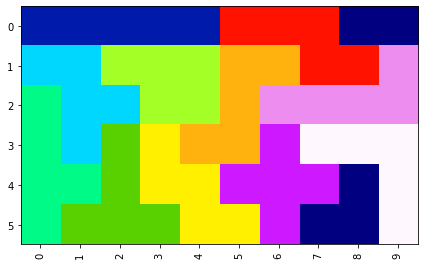

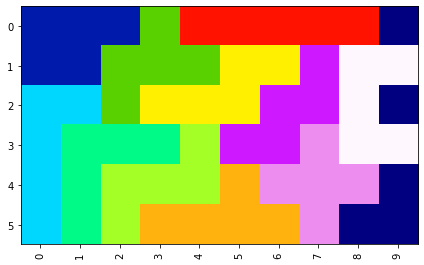

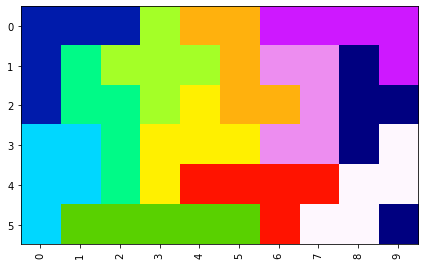

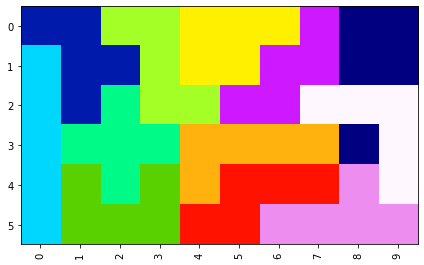

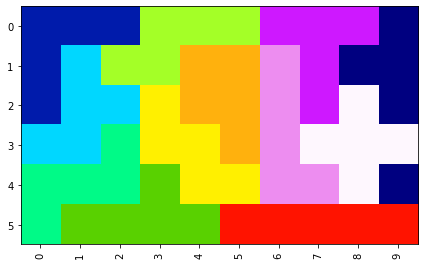

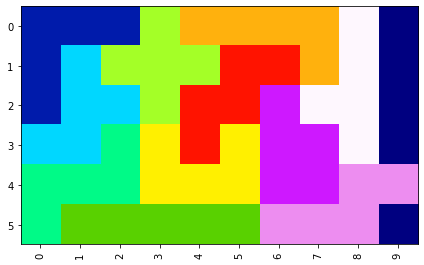

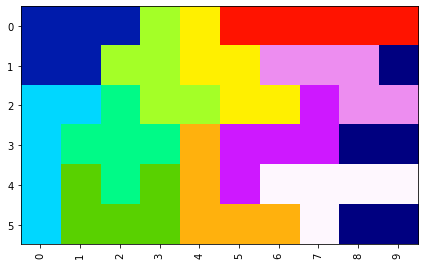

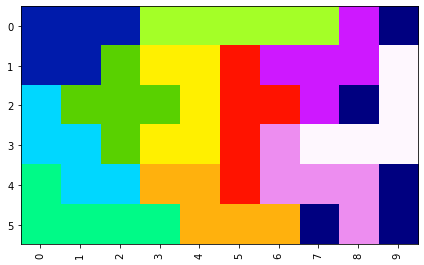

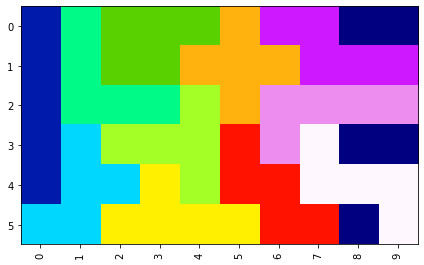

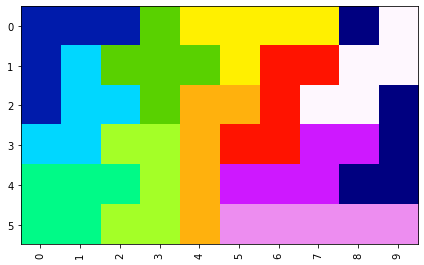

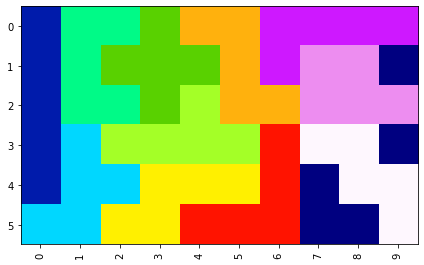

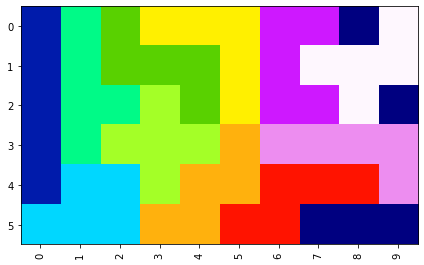

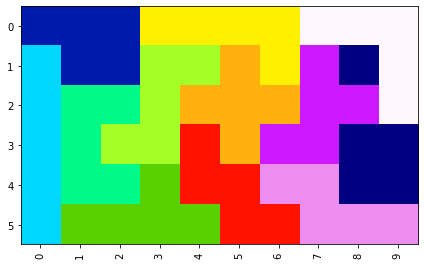

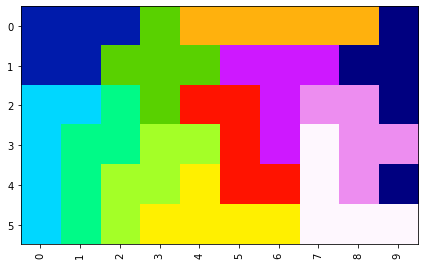

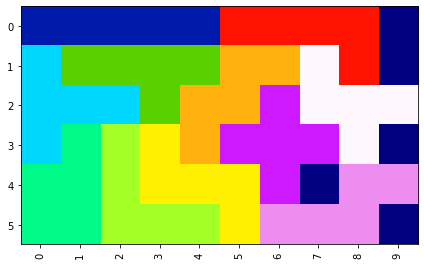

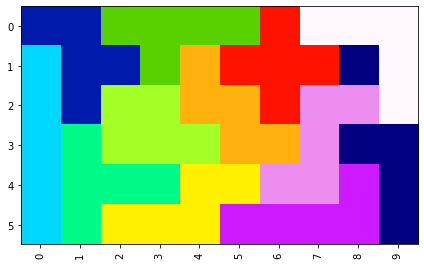

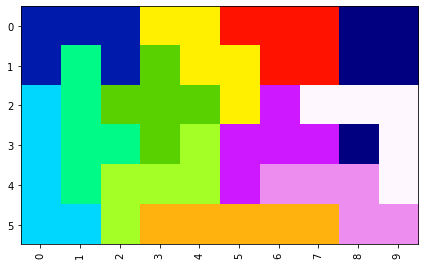

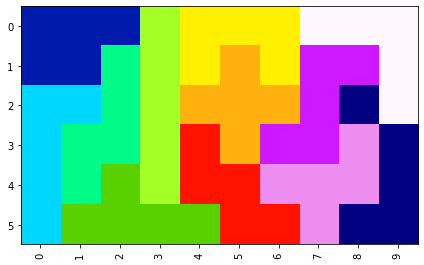

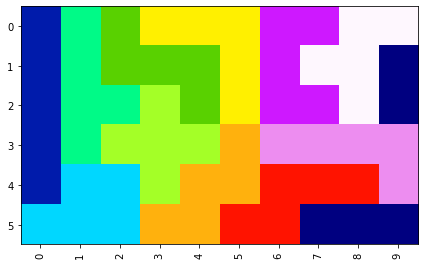

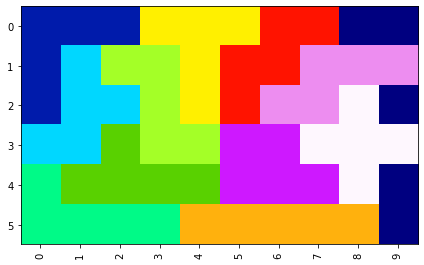

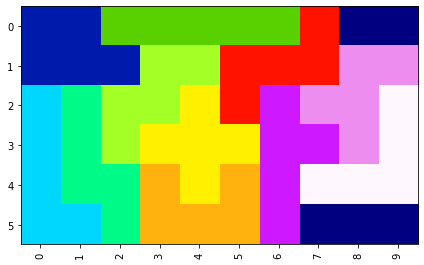

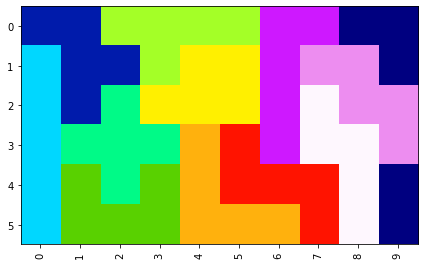

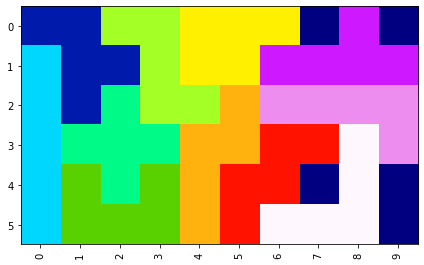

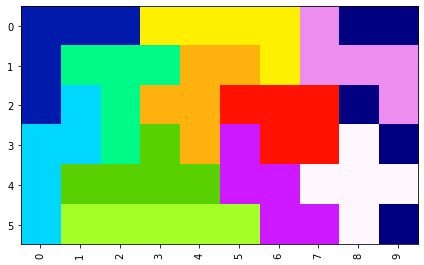

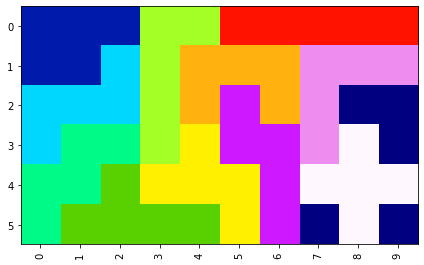

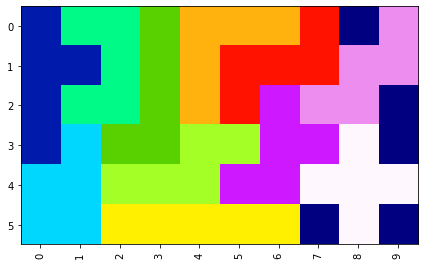

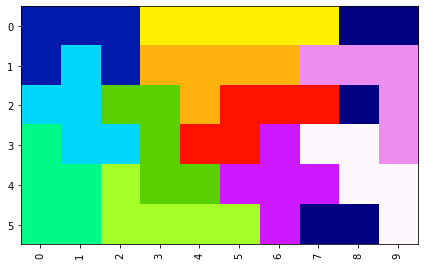

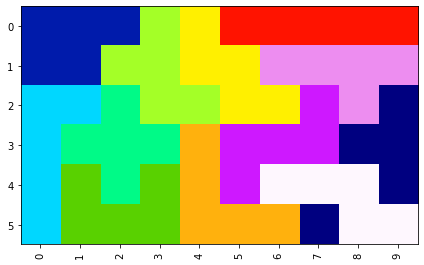

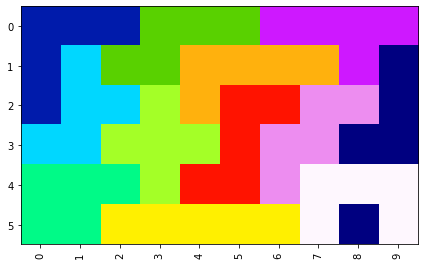

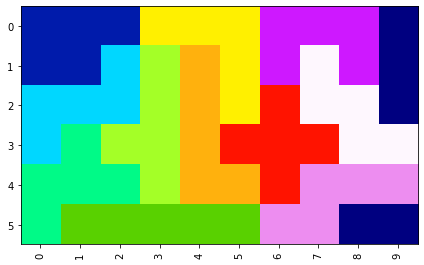

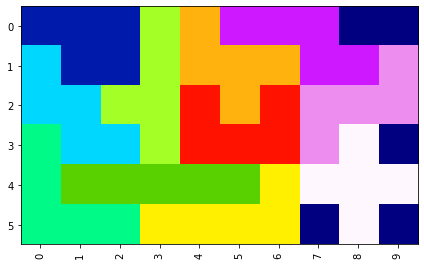

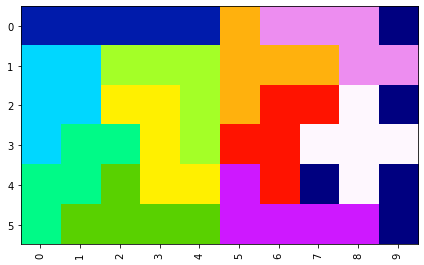

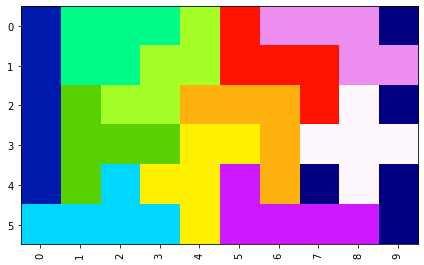

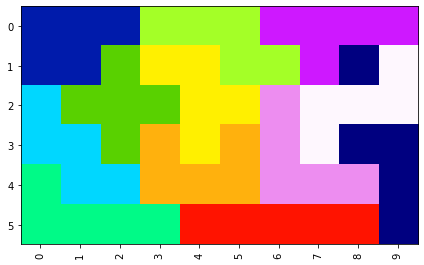

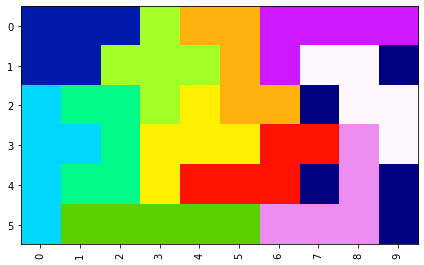

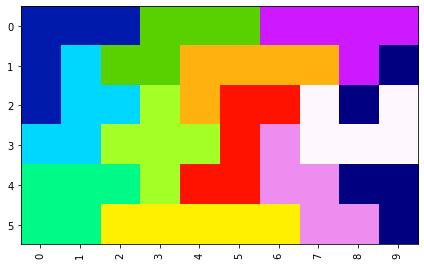

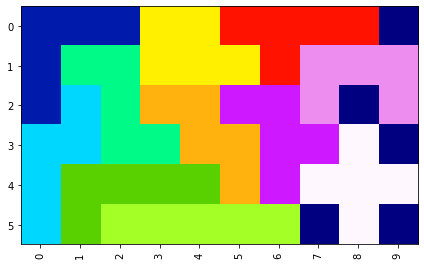

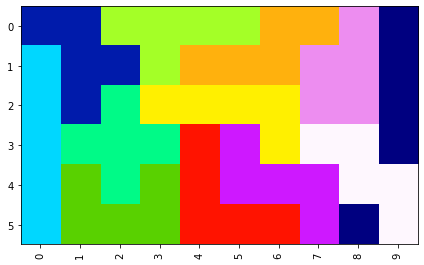

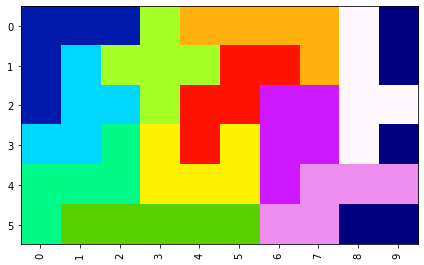

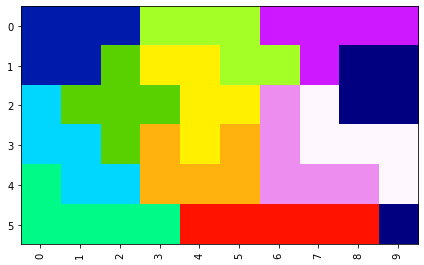

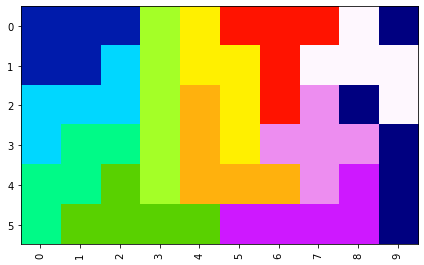

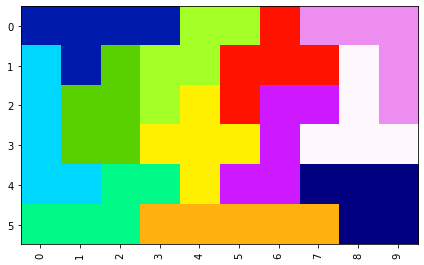

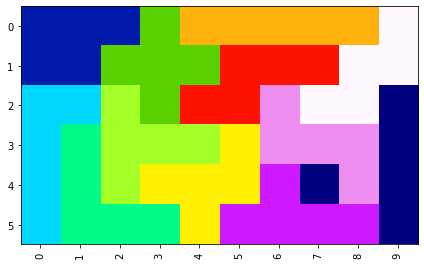

In [ ]:
x_length, y_length, piece_size, same_piece_limit = 8, 5, 4, 2
x_length, y_length, piece_size, same_piece_limit = 10, 6, 5, 1
#x_length, y_length, piece_size, same_piece_limit = 8, 5, 5, 1
best_matrix = solve_puzzle(x_length, y_length, piece_size, same_piece_limit)
best_matrix